In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings('ignore')

We have 2 datasets, one dataset contains the details of the business class and another dataset contains the details of economy class

First we start from business class and then economy class then will merge both of them

In [2]:
#Reading the csv file using pandas
business_class=pd.read_csv('business.csv')

In [3]:
pd.set_option('display.max_columns', None)
#this is used to display all the columns present  

In [4]:
business_class.head()

,date,airline,ch_code,num_code,dep_time,from,time_taken,stop,arr_time,to,price
0,11-02-2022,Air India,AI,868,18:00,Delhi,02h 00m,non-stop,20:00,Mumbai,"25,612"
1,11-02-2022,Air India,AI,624,19:00,Delhi,02h 15m,non-stop,21:15,Mumbai,"25,612"
2,11-02-2022,Air India,AI,531,20:00,Delhi,24h 45m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,20:45,Mumbai,"42,220"
3,11-02-2022,Air India,AI,839,21:25,Delhi,26h 30m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,23:55,Mumbai,"44,450"
4,11-02-2022,Air India,AI,544,17:15,Delhi,06h 40m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,23:55,Mumbai,"46,690"


In [5]:
#Checking for null values in every column
business_class.isnull().sum()

date          0
airline       0
ch_code       0
num_code      0
dep_time      0
from          0
time_taken    0
stop          0
arr_time      0
to            0
price         0
dtype: int64

In [6]:
#Size of the dataset
business_class.shape

(93487, 11)

In [7]:
business_class.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93487 entries, 0 to 93486
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   date        93487 non-null  object
 1   airline     93487 non-null  object
 2   ch_code     93487 non-null  object
 3   num_code    93487 non-null  int64 
 4   dep_time    93487 non-null  object
 5   from        93487 non-null  object
 6   time_taken  93487 non-null  object
 7   stop        93487 non-null  object
 8   arr_time    93487 non-null  object
 9   to          93487 non-null  object
 10  price       93487 non-null  object
dtypes: int64(1), object(10)
memory usage: 7.8+ MB


In [8]:
#Counting unique values in the "stop" column
business_class["stop"].value_counts()

1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t\t\t\t\t\t\t                   81489
non-stop                                                                      8102
2+-stop                                                                       1083
1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia IDR\n\t\t\t\t\t\t\t\t\t\t\t\t              810
1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia IXU\n\t\t\t\t\t\t\t\t\t\t\t\t              776
1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia PAT\n\t\t\t\t\t\t\t\t\t\t\t\t              257
1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia Patna\n\t\t\t\t\t\t\t\t\t\t\t\t            242
1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia BBI\n\t\t\t\t\t\t\t\t\t\t\t\t              152
1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia STV\n\t\t\t\t\t\t\t\t\t\t\t\t               93
1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia IXE\n\t\t\t\t\t\t\t\t\t\t\t\t               86
1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia Bhubaneswar\n\t\t\t\t\t\t\t\t\t\t\t\t       75
1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia Hyderabad\n\t\t\t\t\t\t\t\t\t\t\t\t         71
1-st

In [9]:
# Here many values are starting with number of stops and are mixed with route through which the flight will go
# So we will extract the number of stops as 0 or 1 or 2 stops
# For this the string after number of stops will be removed
# The values starting with 1-stop will be converted into 1 stop , 2-stops and 2+ will be converted into 2 stops as in flight data 2 or more stops are considered as 2 stops


business_class.replace({"non-stop ": 0, 
"1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t\t\t\t\t\t\t": 1, 
"2 stops": 2,
"1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia IDR\n\t\t\t\t\t\t\t\t\t\t\t\t" : 1, 
"1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia IXU\n\t\t\t\t\t\t\t\t\t\t\t\t"   : 1, 
"1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia IXU\n\t\t\t\t\t\t\t\t\t\t\t\t"   :1,
"1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia PAT\n\t\t\t\t\t\t\t\t\t\t\t\t"   :1,
"1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia Patna\n\t\t\t\t\t\t\t\t\t\t\t\t":1,
"1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia BBI\n\t\t\t\t\t\t\t\t\t\t\t\t":1,
"1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia STV\n\t\t\t\t\t\t\t\t\t\t\t\t":1,
"1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia IXE\n\t\t\t\t\t\t\t\t\t\t\t\t":1,          
"1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia Bhubaneswar\n\t\t\t\t\t\t\t\t\t\t\t\t":1,     
"1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia Hyderabad\n\t\t\t\t\t\t\t\t\t\t\t\t":1, 
"1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia Delhi\n\t\t\t\t\t\t\t\t\t\t\t\t":1,
"1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia Raipur\n\t\t\t\t\t\t\t\t\t\t\t\t":1,
"1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia Chennai\n\t\t\t\t\t\t\t\t\t\t\t\t":1,
"1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia Guwahati\n\t\t\t\t\t\t\t\t\t\t\t\t":1,
"1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia VTZ\n\t\t\t\t\t\t\t\t\t\t\t\t":1,
"1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia Kolkata\n\t\t\t\t\t\t\t\t\t\t\t\t":1,
"1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia NDC\n\t\t\t\t\t\t\t\t\t\t\t\t":1,
"1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia RPR\n\t\t\t\t\t\t\t\t\t\t\t\t":1,
"1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia Lucknow\n\t\t\t\t\t\t\t\t\t\t\t\t":1,
"1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia GAU\n\t\t\t\t\t\t\t\t\t\t\t\t":1,
"1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia GAY\n\t\t\t\t\t\t\t\t\t\t\t\t":1,
"1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia Surat\n\t\t\t\t\t\t\t\t\t\t\t\t":1,
"1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia HYD\n\t\t\t\t\t\t\t\t\t\t\t\t":1,
"2+-stop": 2                       }, inplace = True)

In [10]:
business_class["stop"].value_counts()

1    84302
0     8102
2     1083
Name: stop, dtype: int64

The date column is directly of no use but we can calculate how much days are left for flight and how it affects the price of the ticket 

For this we will convert the date column into date format from object format and will subtract the minimum date from the date column of date of flight


In [12]:
#Converting the date column to datetime as date month and year format
business_class['date'] = pd.to_datetime(business_class['date'],  format='%d-%m-%Y')


In [13]:
business_class.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93487 entries, 0 to 93486
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   date        93487 non-null  datetime64[ns]
 1   airline     93487 non-null  object        
 2   ch_code     93487 non-null  object        
 3   num_code    93487 non-null  int64         
 4   dep_time    93487 non-null  object        
 5   from        93487 non-null  object        
 6   time_taken  93487 non-null  object        
 7   stop        93487 non-null  int64         
 8   arr_time    93487 non-null  object        
 9   to          93487 non-null  object        
 10  price       93487 non-null  object        
dtypes: datetime64[ns](1), int64(2), object(8)
memory usage: 7.8+ MB


In [14]:
#Getting the minimum date
min_date = business_class['date'].min()
min_date

Timestamp('2022-02-11 00:00:00')

In [15]:
# Specify the particular date for calculating days_left
specific_date = pd.to_datetime('10-02-2022', format='%d-%m-%Y')

# Calculate the difference in days from the specific date
business_class['days_left'] = (business_class['date'] - specific_date).dt.days

business_class.head()

,date,airline,ch_code,num_code,dep_time,from,time_taken,stop,arr_time,to,price,days_left
0,2022-02-11,Air India,AI,868,18:00,Delhi,02h 00m,0,20:00,Mumbai,"25,612",1
1,2022-02-11,Air India,AI,624,19:00,Delhi,02h 15m,0,21:15,Mumbai,"25,612",1
2,2022-02-11,Air India,AI,531,20:00,Delhi,24h 45m,1,20:45,Mumbai,"42,220",1
3,2022-02-11,Air India,AI,839,21:25,Delhi,26h 30m,1,23:55,Mumbai,"44,450",1
4,2022-02-11,Air India,AI,544,17:15,Delhi,06h 40m,1,23:55,Mumbai,"46,690",1


In [16]:
business_class["Journey_month"] = pd.to_datetime(business_class.date, format="%d/%m/%Y").dt.month
#add a new new column as Journey_month and fill it with values of day from date_fo_Journey

In [17]:
business_class["Journey_day"] = pd.to_datetime(business_class.date, format="%d/%m/%Y").dt.day
#add a new new column as Journey_day and fill it with values of day from date_fo_Journey

In [18]:
#Similarly we will divide the Dep_Time into Dep_hour and Dep_min
# Extracting hours from Departure Time
business_class["Dep_hour"] = pd.to_datetime(business_class["dep_time"]).dt.hour

# Extracting minutes from Departure Time
business_class["Dep_min"] = pd.to_datetime(business_class["dep_time"]).dt.minute

In [19]:
# Now we will extract arrivalhour and minute from Arrival_Time similarly as Departure_time

# Extracting Hours
business_class["Arrival_hour"] = pd.to_datetime(business_class.arr_time).dt.hour

# Extracting Minutes
business_class["Arrival_min"] = pd.to_datetime(business_class.arr_time).dt.minute

In [20]:
business_class.head()

,date,airline,ch_code,num_code,dep_time,from,time_taken,stop,arr_time,to,price,days_left,Journey_month,Journey_day,Dep_hour,Dep_min,Arrival_hour,Arrival_min
0,2022-02-11,Air India,AI,868,18:00,Delhi,02h 00m,0,20:00,Mumbai,"25,612",1,2,11,18,0,20,0
1,2022-02-11,Air India,AI,624,19:00,Delhi,02h 15m,0,21:15,Mumbai,"25,612",1,2,11,19,0,21,15
2,2022-02-11,Air India,AI,531,20:00,Delhi,24h 45m,1,20:45,Mumbai,"42,220",1,2,11,20,0,20,45
3,2022-02-11,Air India,AI,839,21:25,Delhi,26h 30m,1,23:55,Mumbai,"44,450",1,2,11,21,25,23,55
4,2022-02-11,Air India,AI,544,17:15,Delhi,06h 40m,1,23:55,Mumbai,"46,690",1,2,11,17,15,23,55


In [21]:
business_class["price"].value_counts()


54,608    1445
54,684    1390
60,978    1383
60,508    1230
49,725    1205
          ... 
92,081       1
89,695       1
70,655       1
69,171       1
85,353       1
Name: price, Length: 2358, dtype: int64

The price column has impurities as in the price it contains a "," in-between the number so we will remove it

In [22]:
business_class['price'] = business_class['price'].str.replace(',', '')
business_class['price'] = pd.to_numeric(business_class['price'])


In [23]:
business_class["price"].value_counts()


54608    1445
54684    1390
60978    1383
60508    1230
49725    1205
         ... 
92081       1
89695       1
70655       1
69171       1
85353       1
Name: price, Length: 2358, dtype: int64

In [24]:
business_class.describe()

,num_code,stop,price,days_left,Journey_month,Journey_day,Dep_hour,Dep_min,Arrival_hour,Arrival_min
count,93487.000000,93487.000000,93487.000000,93487.000000,93487.00000,93487.000000,93487.000000,93487.000000,93487.000000,93487.000000
mean,780.056147,0.924920,52540.081124,25.741857,2.65531,17.393167,13.290939,27.384877,15.687454,30.586071
std,147.616038,0.304324,12969.314606,13.626538,0.47527,8.006528,5.358745,17.707500,5.604107,19.180521
min,401.000000,0.000000,12000.000000,1.000000,2.00000,1.000000,2.000000,0.000000,0.000000,0.000000
25%,706.000000,1.000000,45185.000000,14.000000,2.00000,12.000000,8.000000,10.000000,11.000000,15.000000
50%,820.000000,1.000000,53164.000000,26.000000,3.00000,18.000000,13.000000,30.000000,17.000000,35.000000
75%,874.000000,1.000000,60396.000000,38.000000,3.00000,24.000000,19.000000,45.000000,20.000000,50.000000
max,996.000000,2.000000,123071.000000,49.000000,3.00000,31.000000,23.000000,55.000000,23.000000,55.000000


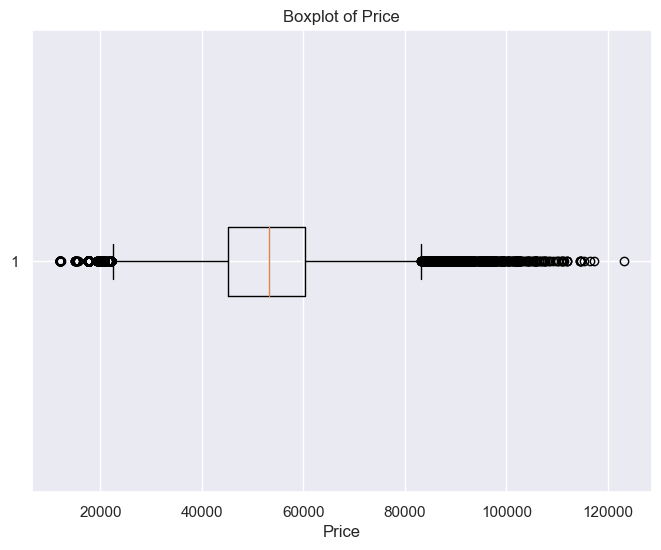

In [25]:
price_column = 'price'  # Replace 'price' with the actual column name from your dataset

# Create the boxplot
plt.figure(figsize=(8, 6))  # Set the figure size
plt.boxplot(business_class[price_column], vert=False)  # Create the boxplot horizontally
plt.title('Boxplot of Price')  # Set the title of the plot
plt.xlabel('Price')  # Set the label for the x-axis
plt.grid(True)  # Add gridlines
plt.show()  # Display the plot

Removing outliers

In [26]:
df = business_class[(business_class['price'] >= 23500) & (business_class['price'] <= 82000)]


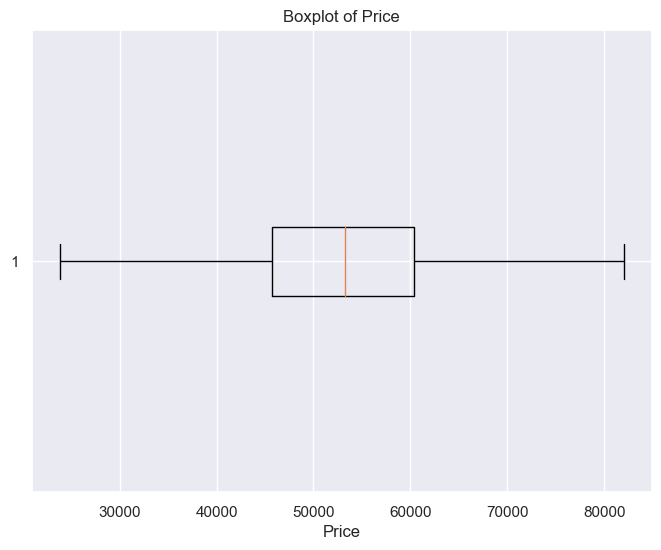

In [27]:
price_column = 'price'  
# Create the boxplot
plt.figure(figsize=(8, 6))
plt.boxplot(df[price_column], vert=False)  
plt.title('Boxplot of Price')  
plt.xlabel('Price')  
plt.grid(True)  
plt.show()  

Now all the outliers have been removed so we will update the dataset

In [28]:
df.to_csv('business.csv', index=False)

In [29]:
business_class=pd.read_csv('business.csv')

In [30]:
business_class.head()

,date,airline,ch_code,num_code,dep_time,from,time_taken,stop,arr_time,to,price,days_left,Journey_month,Journey_day,Dep_hour,Dep_min,Arrival_hour,Arrival_min
0,2022-02-11,Air India,AI,868,18:00,Delhi,02h 00m,0,20:00,Mumbai,25612,1,2,11,18,0,20,0
1,2022-02-11,Air India,AI,624,19:00,Delhi,02h 15m,0,21:15,Mumbai,25612,1,2,11,19,0,21,15
2,2022-02-11,Air India,AI,531,20:00,Delhi,24h 45m,1,20:45,Mumbai,42220,1,2,11,20,0,20,45
3,2022-02-11,Air India,AI,839,21:25,Delhi,26h 30m,1,23:55,Mumbai,44450,1,2,11,21,25,23,55
4,2022-02-11,Air India,AI,544,17:15,Delhi,06h 40m,1,23:55,Mumbai,46690,1,2,11,17,15,23,55


In [31]:
business_class.isnull().sum()

date             0
airline          0
ch_code          0
num_code         0
dep_time         0
from             0
time_taken       0
stop             0
arr_time         0
to               0
price            0
days_left        0
Journey_month    0
Journey_day      0
Dep_hour         0
Dep_min          0
Arrival_hour     0
Arrival_min      0
dtype: int64

For better understanding we will rename the columns as 'from'-> 'source', 'to'-> 'destination'

In [32]:
business_class.rename(columns={'from': 'source', 'to': 'destination'}, inplace=True)


In [33]:
business_class.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89413 entries, 0 to 89412
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   date           89413 non-null  object
 1   airline        89413 non-null  object
 2   ch_code        89413 non-null  object
 3   num_code       89413 non-null  int64 
 4   dep_time       89413 non-null  object
 5   source         89413 non-null  object
 6   time_taken     89413 non-null  object
 7   stop           89413 non-null  int64 
 8   arr_time       89413 non-null  object
 9   destination    89413 non-null  object
 10  price          89413 non-null  int64 
 11  days_left      89413 non-null  int64 
 12  Journey_month  89413 non-null  int64 
 13  Journey_day    89413 non-null  int64 
 14  Dep_hour       89413 non-null  int64 
 15  Dep_min        89413 non-null  int64 
 16  Arrival_hour   89413 non-null  int64 
 17  Arrival_min    89413 non-null  int64 
dtypes: int64(10), object(8)
me

We will convert the dep_time and arr_time into time frames of a day

In [34]:
business_class['dep_time'] = business_class['dep_time'].str.replace(':', '')
business_class['dep_time'] = pd.to_numeric(business_class['dep_time'])


In [35]:
business_class

,date,airline,ch_code,num_code,dep_time,source,time_taken,stop,arr_time,destination,price,days_left,Journey_month,Journey_day,Dep_hour,Dep_min,Arrival_hour,Arrival_min
0,2022-02-11,Air India,AI,868,1800,Delhi,02h 00m,0,20:00,Mumbai,25612,1,2,11,18,0,20,0
1,2022-02-11,Air India,AI,624,1900,Delhi,02h 15m,0,21:15,Mumbai,25612,1,2,11,19,0,21,15
2,2022-02-11,Air India,AI,531,2000,Delhi,24h 45m,1,20:45,Mumbai,42220,1,2,11,20,0,20,45
3,2022-02-11,Air India,AI,839,2125,Delhi,26h 30m,1,23:55,Mumbai,44450,1,2,11,21,25,23,55
4,2022-02-11,Air India,AI,544,1715,Delhi,06h 40m,1,23:55,Mumbai,46690,1,2,11,17,15,23,55
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89408,2022-03-31,Vistara,UK,822,945,Chennai,10h 05m,1,19:50,Hyderabad,69265,49,3,31,9,45,19,50
89409,2022-03-31,Vistara,UK,826,1230,Chennai,10h 25m,1,22:55,Hyderabad,77105,49,3,31,12,30,22,55
89410,2022-03-31,Vistara,UK,832,705,Chennai,13h 50m,1,20:55,Hyderabad,79099,49,3,31,7,5,20,55
89411,2022-03-31,Vistara,UK,828,700,Chennai,10h 00m,1,17:00,Hyderabad,81585,49,3,31,7,0,17,0


In [36]:
business_class

,date,airline,ch_code,num_code,dep_time,source,time_taken,stop,arr_time,destination,price,days_left,Journey_month,Journey_day,Dep_hour,Dep_min,Arrival_hour,Arrival_min
0,2022-02-11,Air India,AI,868,1800,Delhi,02h 00m,0,20:00,Mumbai,25612,1,2,11,18,0,20,0
1,2022-02-11,Air India,AI,624,1900,Delhi,02h 15m,0,21:15,Mumbai,25612,1,2,11,19,0,21,15
2,2022-02-11,Air India,AI,531,2000,Delhi,24h 45m,1,20:45,Mumbai,42220,1,2,11,20,0,20,45
3,2022-02-11,Air India,AI,839,2125,Delhi,26h 30m,1,23:55,Mumbai,44450,1,2,11,21,25,23,55
4,2022-02-11,Air India,AI,544,1715,Delhi,06h 40m,1,23:55,Mumbai,46690,1,2,11,17,15,23,55
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89408,2022-03-31,Vistara,UK,822,945,Chennai,10h 05m,1,19:50,Hyderabad,69265,49,3,31,9,45,19,50
89409,2022-03-31,Vistara,UK,826,1230,Chennai,10h 25m,1,22:55,Hyderabad,77105,49,3,31,12,30,22,55
89410,2022-03-31,Vistara,UK,832,705,Chennai,13h 50m,1,20:55,Hyderabad,79099,49,3,31,7,5,20,55
89411,2022-03-31,Vistara,UK,828,700,Chennai,10h 00m,1,17:00,Hyderabad,81585,49,3,31,7,0,17,0


In [37]:
#Joining the 'ch_code' and 'num_code' to get a new column as flight
business_class['flight'] = business_class['ch_code'] + '-' + business_class['num_code'].astype(str)

In [38]:
business_class.head()

,date,airline,ch_code,num_code,dep_time,source,time_taken,stop,arr_time,destination,price,days_left,Journey_month,Journey_day,Dep_hour,Dep_min,Arrival_hour,Arrival_min,flight
0,2022-02-11,Air India,AI,868,1800,Delhi,02h 00m,0,20:00,Mumbai,25612,1,2,11,18,0,20,0,AI-868
1,2022-02-11,Air India,AI,624,1900,Delhi,02h 15m,0,21:15,Mumbai,25612,1,2,11,19,0,21,15,AI-624
2,2022-02-11,Air India,AI,531,2000,Delhi,24h 45m,1,20:45,Mumbai,42220,1,2,11,20,0,20,45,AI-531
3,2022-02-11,Air India,AI,839,2125,Delhi,26h 30m,1,23:55,Mumbai,44450,1,2,11,21,25,23,55,AI-839
4,2022-02-11,Air India,AI,544,1715,Delhi,06h 40m,1,23:55,Mumbai,46690,1,2,11,17,15,23,55,AI-544


In [39]:
#We need duration as numerical hours and minutes 
#For this we will assign and convert Duration column into list

duration = list(business_class["time_taken"])

for i in range(len(duration)):
    if len(duration[i].split()) != 2:                   # Check if duration contains only hour or mins
        if "h" in duration[i]:
            duration[i] = duration[i].strip() + " 0m"   # Adds 0 minute
        else:
            duration[i] = "0h " + duration[i]           # Adds 0 hour

duration_hours = []
duration_mins = []


In [40]:
for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep = "h")[0]))              # Extract hours from duration
    duration_mins.append(int(duration[i].split(sep = "m")[0].split()[-1]))   # Extracts only minutes from duration
        

In [41]:
# Adding duration_hours and duration_mins list to train_data dataframe

business_class["Duration_hours"] = duration_hours
business_class["Duration_mins"] = duration_mins

In [42]:
business_class.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89413 entries, 0 to 89412
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   date            89413 non-null  object
 1   airline         89413 non-null  object
 2   ch_code         89413 non-null  object
 3   num_code        89413 non-null  int64 
 4   dep_time        89413 non-null  int64 
 5   source          89413 non-null  object
 6   time_taken      89413 non-null  object
 7   stop            89413 non-null  int64 
 8   arr_time        89413 non-null  object
 9   destination     89413 non-null  object
 10  price           89413 non-null  int64 
 11  days_left       89413 non-null  int64 
 12  Journey_month   89413 non-null  int64 
 13  Journey_day     89413 non-null  int64 
 14  Dep_hour        89413 non-null  int64 
 15  Dep_min         89413 non-null  int64 
 16  Arrival_hour    89413 non-null  int64 
 17  Arrival_min     89413 non-null  int64 
 18  flight

In [43]:
# Creating a new column as 'class' so that all the values can be referred as of business class
business_class['ticket_type'] = 'business'

business_class.head()

,date,airline,ch_code,num_code,dep_time,source,time_taken,stop,arr_time,destination,price,days_left,Journey_month,Journey_day,Dep_hour,Dep_min,Arrival_hour,Arrival_min,flight,Duration_hours,Duration_mins,ticket_type
0,2022-02-11,Air India,AI,868,1800,Delhi,02h 00m,0,20:00,Mumbai,25612,1,2,11,18,0,20,0,AI-868,2,0,business
1,2022-02-11,Air India,AI,624,1900,Delhi,02h 15m,0,21:15,Mumbai,25612,1,2,11,19,0,21,15,AI-624,2,15,business
2,2022-02-11,Air India,AI,531,2000,Delhi,24h 45m,1,20:45,Mumbai,42220,1,2,11,20,0,20,45,AI-531,24,45,business
3,2022-02-11,Air India,AI,839,2125,Delhi,26h 30m,1,23:55,Mumbai,44450,1,2,11,21,25,23,55,AI-839,26,30,business
4,2022-02-11,Air India,AI,544,1715,Delhi,06h 40m,1,23:55,Mumbai,46690,1,2,11,17,15,23,55,AI-544,6,40,business


In [44]:
#As 'ch_code' , 'num_code' , 'time_taken' and 'date' column are of no use we will delete these columns
business_class.drop(["ch_code"], axis = 1, inplace = True)
business_class.drop(["num_code"], axis = 1, inplace = True)
business_class.drop(["time_taken"], axis = 1, inplace = True)
business_class.drop(["date"], axis = 1, inplace = True)

business_class.drop(["dep_time"], axis = 1, inplace = True)
business_class.drop(["arr_time"], axis = 1, inplace = True)



In [45]:
business_class.dropna(inplace = True)
#to drop the rows containing NaN values

In [46]:
business_class.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89413 entries, 0 to 89412
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   airline         89413 non-null  object
 1   source          89413 non-null  object
 2   stop            89413 non-null  int64 
 3   destination     89413 non-null  object
 4   price           89413 non-null  int64 
 5   days_left       89413 non-null  int64 
 6   Journey_month   89413 non-null  int64 
 7   Journey_day     89413 non-null  int64 
 8   Dep_hour        89413 non-null  int64 
 9   Dep_min         89413 non-null  int64 
 10  Arrival_hour    89413 non-null  int64 
 11  Arrival_min     89413 non-null  int64 
 12  flight          89413 non-null  object
 13  Duration_hours  89413 non-null  int64 
 14  Duration_mins   89413 non-null  int64 
 15  ticket_type     89413 non-null  object
dtypes: int64(11), object(5)
memory usage: 10.9+ MB


In [47]:
business_class.head()

,airline,source,stop,destination,price,days_left,Journey_month,Journey_day,Dep_hour,Dep_min,Arrival_hour,Arrival_min,flight,Duration_hours,Duration_mins,ticket_type
0,Air India,Delhi,0,Mumbai,25612,1,2,11,18,0,20,0,AI-868,2,0,business
1,Air India,Delhi,0,Mumbai,25612,1,2,11,19,0,21,15,AI-624,2,15,business
2,Air India,Delhi,1,Mumbai,42220,1,2,11,20,0,20,45,AI-531,24,45,business
3,Air India,Delhi,1,Mumbai,44450,1,2,11,21,25,23,55,AI-839,26,30,business
4,Air India,Delhi,1,Mumbai,46690,1,2,11,17,15,23,55,AI-544,6,40,business


In [48]:
business_class.shape

(89413, 16)

Now our business_class data is ready 

Next we will prepare economy_class

In [62]:
economy_class=pd.read_csv('economy.csv')

In [63]:
economy_class

,date,airline,ch_code,num_code,dep_time,from,time_taken,stop,arr_time,to,price
0,11-02-2022,SpiceJet,SG,8709,18:55,Delhi,02h 10m,non-stop,21:05,Mumbai,"5,953"
1,11-02-2022,SpiceJet,SG,8157,06:20,Delhi,02h 20m,non-stop,08:40,Mumbai,"5,953"
2,11-02-2022,AirAsia,I5,764,04:25,Delhi,02h 10m,non-stop,06:35,Mumbai,"5,956"
3,11-02-2022,Vistara,UK,995,10:20,Delhi,02h 15m,non-stop,12:35,Mumbai,"5,955"
4,11-02-2022,Vistara,UK,963,08:50,Delhi,02h 20m,non-stop,11:10,Mumbai,"5,955"
...,...,...,...,...,...,...,...,...,...,...,...
206769,31-03-2022,Vistara,UK,832,07:05,Chennai,13h 50m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,20:55,Hyderabad,"7,697"
206770,31-03-2022,Vistara,UK,832,07:05,Chennai,13h 50m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,20:55,Hyderabad,"7,709"
206771,31-03-2022,Vistara,UK,826,12:30,Chennai,20h 35m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,09:05,Hyderabad,"8,640"
206772,31-03-2022,Vistara,UK,822,09:45,Chennai,23h 20m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,09:05,Hyderabad,"8,640"


In [64]:
#Checkinf for any null valurs
economy_class.isnull().sum()

date          0
airline       0
ch_code       0
num_code      0
dep_time      0
from          0
time_taken    0
stop          0
arr_time      0
to            0
price         0
dtype: int64

In [65]:
# Creating a new column as 'class' so that all the values can be referred as of economy class
economy_class['ticket_type'] = 'economy'

economy_class.head()

,date,airline,ch_code,num_code,dep_time,from,time_taken,stop,arr_time,to,price,ticket_type
0,11-02-2022,SpiceJet,SG,8709,18:55,Delhi,02h 10m,non-stop,21:05,Mumbai,"5,953",economy
1,11-02-2022,SpiceJet,SG,8157,06:20,Delhi,02h 20m,non-stop,08:40,Mumbai,"5,953",economy
2,11-02-2022,AirAsia,I5,764,04:25,Delhi,02h 10m,non-stop,06:35,Mumbai,"5,956",economy
3,11-02-2022,Vistara,UK,995,10:20,Delhi,02h 15m,non-stop,12:35,Mumbai,"5,955",economy
4,11-02-2022,Vistara,UK,963,08:50,Delhi,02h 20m,non-stop,11:10,Mumbai,"5,955",economy


In [66]:
economy_class.head()

,date,airline,ch_code,num_code,dep_time,from,time_taken,stop,arr_time,to,price,ticket_type
0,11-02-2022,SpiceJet,SG,8709,18:55,Delhi,02h 10m,non-stop,21:05,Mumbai,"5,953",economy
1,11-02-2022,SpiceJet,SG,8157,06:20,Delhi,02h 20m,non-stop,08:40,Mumbai,"5,953",economy
2,11-02-2022,AirAsia,I5,764,04:25,Delhi,02h 10m,non-stop,06:35,Mumbai,"5,956",economy
3,11-02-2022,Vistara,UK,995,10:20,Delhi,02h 15m,non-stop,12:35,Mumbai,"5,955",economy
4,11-02-2022,Vistara,UK,963,08:50,Delhi,02h 20m,non-stop,11:10,Mumbai,"5,955",economy


In [67]:
# Here many values are starting with number of stops and are mixed with route through which the flight will go
# So we will extract the number of stops as 0 or 1 or 2 stops
# For this the string after number of stops will be removed
# The values starting with 1-stop will be converted into 1 stop , 2-stops and 2+ will be converted into 2 stops as in flight data 2 or more stops are considered as 2 stops



economy_class.replace({"non-stop ": 0, "1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t\t\t\t\t\t\t": 1, "2 stops": 2, "3 stops": 3, "1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia IDR\n\t\t\t\t\t\t\t\t\t\t\t\t" : 1, 
"1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia IXU\n\t\t\t\t\t\t\t\t\t\t\t\t"   : 1, 
"1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia IXU\n\t\t\t\t\t\t\t\t\t\t\t\t"   :1,
"1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia PAT\n\t\t\t\t\t\t\t\t\t\t\t\t"   :1,
"1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia Patna\n\t\t\t\t\t\t\t\t\t\t\t\t":1,
"1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia BBI\n\t\t\t\t\t\t\t\t\t\t\t\t":1,
"1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia STV\n\t\t\t\t\t\t\t\t\t\t\t\t":1,
"1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia IXE\n\t\t\t\t\t\t\t\t\t\t\t\t":1,          
"1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia Bhubaneswar\n\t\t\t\t\t\t\t\t\t\t\t\t":1,     
"1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia Hyderabad\n\t\t\t\t\t\t\t\t\t\t\t\t":1, 
"1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia Delhi\n\t\t\t\t\t\t\t\t\t\t\t\t":1,
"1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia Raipur\n\t\t\t\t\t\t\t\t\t\t\t\t":1,
"1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia Chennai\n\t\t\t\t\t\t\t\t\t\t\t\t":1,
"1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia Guwahati\n\t\t\t\t\t\t\t\t\t\t\t\t":1,
"1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia VTZ\n\t\t\t\t\t\t\t\t\t\t\t\t":1,
"1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia Kolkata\n\t\t\t\t\t\t\t\t\t\t\t\t":1,
"1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia NDC\n\t\t\t\t\t\t\t\t\t\t\t\t":1,
"1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia RPR\n\t\t\t\t\t\t\t\t\t\t\t\t":1,
"1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia Lucknow\n\t\t\t\t\t\t\t\t\t\t\t\t":1,
"1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia GAU\n\t\t\t\t\t\t\t\t\t\t\t\t":1,
"1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia GAY\n\t\t\t\t\t\t\t\t\t\t\t\t":1,
"1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia Surat\n\t\t\t\t\t\t\t\t\t\t\t\t":1,
"1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia HYD\n\t\t\t\t\t\t\t\t\t\t\t\t":1,
"1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia Indore\n\t\t\t\t\t\t\t\t\t\t\t\t":1,
"1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia MYQ\n\t\t\t\t\t\t\t\t\t\t\t\t":1,
"1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia KLH\n\t\t\t\t\t\t\t\t\t\t\t\t":1,
"1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia JGB\n\t\t\t\t\t\t\t\t\t\t\t\t":1,
"1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia JRG\n\t\t\t\t\t\t\t\t\t\t\t\t":1,
"1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia Ranchi\n\t\t\t\t\t\t\t\t\t\t\t\t":1,
"1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia Mysore\n\t\t\t\t\t\t\t\t\t\t\t\t":1,
"1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia Mangalore\n\t\t\t\t\t\t\t\t\t\t\t\t":1,
"1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia Mumbai\n\t\t\t\t\t\t\t\t\t\t\t\t":1,
"1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia Nagpur\n\t\t\t\t\t\t\t\t\t\t\t\t":1,
"1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia GOP\n\t\t\t\t\t\t\t\t\t\t\t\t":1,
"1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia NAG\n\t\t\t\t\t\t\t\t\t\t\t\t":1,
"1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia Vishakhapatnam\n\t\t\t\t\t\t\t\t\t\t\t\t":1,
"1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia Kolhapur\n\t\t\t\t\t\t\t\t\t\t\t\t":1,
"1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia IXR\n\t\t\t\t\t\t\t\t\t\t\t\t":1,                
"2+-stop": 2}, inplace = True)

In [68]:
economy_class["stop"].value_counts()


1    166627
0     27942
2     12205
Name: stop, dtype: int64

In [69]:
#Joining the 'ch_code' and 'num_code' to get a new column as flight
economy_class['flight'] = economy_class['ch_code'] + '-' + economy_class['num_code'].astype(str)

The date column is directly of no use but we can calculate how much days are left for flight and how it affects the price of the ticket

For this we will convert the date column into date format from object format and will subtract the minimum date from the date column of date of flight

In [70]:
economy_class['date'] = pd.to_datetime(economy_class['date'], format='%d-%m-%Y')


In [71]:
min_date = economy_class['date'].min()
min_date

Timestamp('2022-02-11 00:00:00')

In [72]:
specific_date = pd.to_datetime('10-02-2022', format='%d-%m-%Y')
economy_class['days_left'] = (economy_class['date']-specific_date ).dt.days

In [73]:
economy_class.head()

,date,airline,ch_code,num_code,dep_time,from,time_taken,stop,arr_time,to,price,ticket_type,flight,days_left
0,2022-02-11,SpiceJet,SG,8709,18:55,Delhi,02h 10m,0,21:05,Mumbai,"5,953",economy,SG-8709,1
1,2022-02-11,SpiceJet,SG,8157,06:20,Delhi,02h 20m,0,08:40,Mumbai,"5,953",economy,SG-8157,1
2,2022-02-11,AirAsia,I5,764,04:25,Delhi,02h 10m,0,06:35,Mumbai,"5,956",economy,I5-764,1
3,2022-02-11,Vistara,UK,995,10:20,Delhi,02h 15m,0,12:35,Mumbai,"5,955",economy,UK-995,1
4,2022-02-11,Vistara,UK,963,08:50,Delhi,02h 20m,0,11:10,Mumbai,"5,955",economy,UK-963,1


In [74]:
economy_class["Journey_day"] = pd.to_datetime(economy_class.date, format="%d/%m/%Y").dt.day
#add a new new column as Journey_day and fill it with values of day from date_fo_Journey

In [75]:
economy_class["Journey_month"] = pd.to_datetime(economy_class.date, format="%d/%m/%Y").dt.month
#add a new new column as Journey_month and fill it with values of day from date_fo_Journey

In [76]:
#Similarly we will divide the Dep_Time into Dep_hour and Dep_min
# Extracting hours from Departure Time
economy_class["Dep_hour"] = pd.to_datetime(economy_class["dep_time"]).dt.hour

# Extracting minutes from Departure Time
economy_class["Dep_min"] = pd.to_datetime(economy_class["dep_time"]).dt.minute

In [77]:
# Now we will extract arrivalhour and minute from Arrival_Time similarly as Departure_time

# Extracting Hours
economy_class["Arrival_hour"] = pd.to_datetime(economy_class.arr_time).dt.hour

# Extracting Minutes
economy_class["Arrival_min"] = pd.to_datetime(economy_class.arr_time).dt.minute

In [78]:
economy_class.head()

,date,airline,ch_code,num_code,dep_time,from,time_taken,stop,arr_time,to,price,ticket_type,flight,days_left,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min
0,2022-02-11,SpiceJet,SG,8709,18:55,Delhi,02h 10m,0,21:05,Mumbai,"5,953",economy,SG-8709,1,11,2,18,55,21,5
1,2022-02-11,SpiceJet,SG,8157,06:20,Delhi,02h 20m,0,08:40,Mumbai,"5,953",economy,SG-8157,1,11,2,6,20,8,40
2,2022-02-11,AirAsia,I5,764,04:25,Delhi,02h 10m,0,06:35,Mumbai,"5,956",economy,I5-764,1,11,2,4,25,6,35
3,2022-02-11,Vistara,UK,995,10:20,Delhi,02h 15m,0,12:35,Mumbai,"5,955",economy,UK-995,1,11,2,10,20,12,35
4,2022-02-11,Vistara,UK,963,08:50,Delhi,02h 20m,0,11:10,Mumbai,"5,955",economy,UK-963,1,11,2,8,50,11,10


Removing outlier from price column

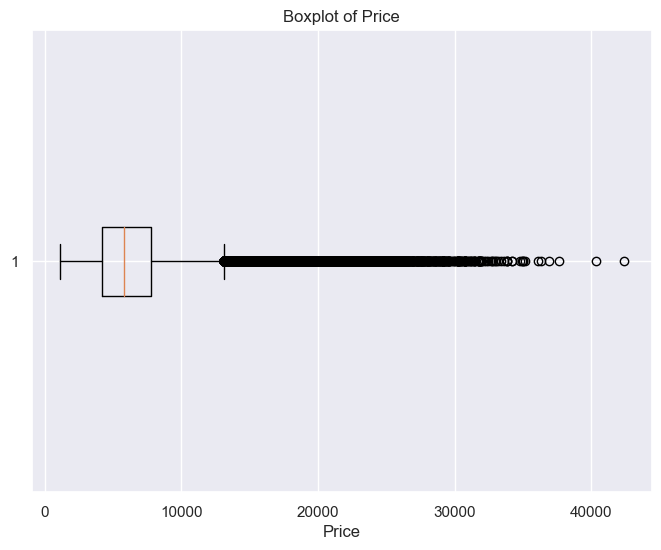

In [79]:
economy_class['price'] = economy_class['price'].str.replace(',', '')
economy_class['price'] = pd.to_numeric(economy_class['price'])

# Specify the column of prices for which you want to create the boxplot
price_column = 'price'  # Replace 'price' with the actual column name from your dataset

# Create the boxplot
plt.figure(figsize=(8, 6))  # Set the figure size
plt.boxplot(economy_class[price_column], vert=False)  # Create the boxplot horizontally
plt.title('Boxplot of Price')  # Set the title of the plot
plt.xlabel('Price')  # Set the label for the x-axis
plt.grid(True)  # Add gridlines
plt.show()  # Display the plot


In [80]:
df = economy_class[(economy_class['price'] <= 10100)]


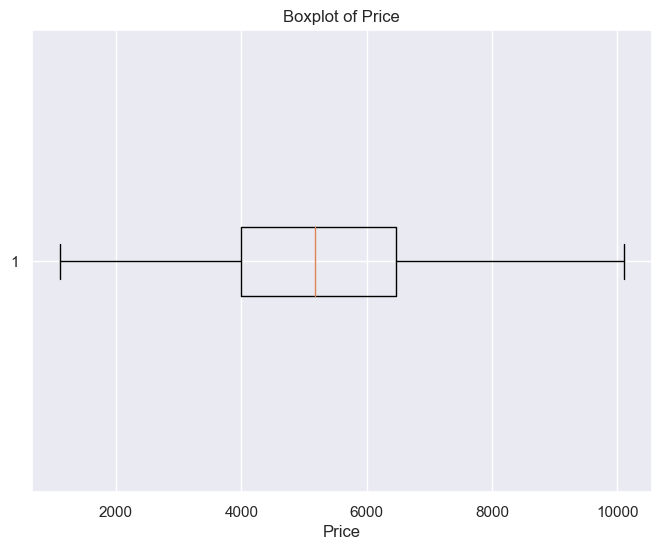

In [81]:
price_column = 'price'  # Replace 'price' with the actual column name from your dataset

# Create the boxplot
plt.figure(figsize=(8, 6))  # Set the figure size
plt.boxplot(df[price_column], vert=False)  # Create the boxplot horizontally
plt.title('Boxplot of Price')  # Set the title of the plot
plt.xlabel('Price')  # Set the label for the x-axis
plt.grid(True)  # Add gridlines
plt.show()  # Display the plot

In [82]:
df.to_csv('economy.csv', index=False)


In [83]:
economy_class=pd.read_csv('economy.csv')

In [84]:
economy_class.head()

,date,airline,ch_code,num_code,dep_time,from,time_taken,stop,arr_time,to,price,ticket_type,flight,days_left,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min
0,2022-02-11,SpiceJet,SG,8709,18:55,Delhi,02h 10m,0,21:05,Mumbai,5953,economy,SG-8709,1,11,2,18,55,21,5
1,2022-02-11,SpiceJet,SG,8157,06:20,Delhi,02h 20m,0,08:40,Mumbai,5953,economy,SG-8157,1,11,2,6,20,8,40
2,2022-02-11,AirAsia,I5,764,04:25,Delhi,02h 10m,0,06:35,Mumbai,5956,economy,I5-764,1,11,2,4,25,6,35
3,2022-02-11,Vistara,UK,995,10:20,Delhi,02h 15m,0,12:35,Mumbai,5955,economy,UK-995,1,11,2,10,20,12,35
4,2022-02-11,Vistara,UK,963,08:50,Delhi,02h 20m,0,11:10,Mumbai,5955,economy,UK-963,1,11,2,8,50,11,10


Removing outliers from duration column

In [85]:
economy_class_filtered = economy_class[economy_class['time_taken'].str.match(r'^\d{2}h \d{2}m$')]

# Save the filtered dataset to a new CSV file
economy_class_filtered.to_csv('economy.csv', index=False)

In [86]:
economy_class=pd.read_csv('economy.csv')

In [87]:
#We need duration as numerical hours and minutes 
#For this we will assign and convert Duration column into list

duration = list(economy_class["time_taken"])

for i in range(len(duration)):
    if len(duration[i].split()) != 2:                   # Check if duration contains only hour or mins
        if "h" in duration[i]:
            duration[i] = duration[i].strip() + " 0m"   # Adds 0 minute
        else:
            duration[i] = "0h " + duration[i]           # Adds 0 hour

duration_hours = []
duration_mins = []    
for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep = "h")[0]))              # Extract hours from duration
    duration_mins.append(int(duration[i].split(sep = "m")[0].split()[-1]))   # Extracts only minutes from duration
            
        

In [88]:
economy_class.head()

,date,airline,ch_code,num_code,dep_time,from,time_taken,stop,arr_time,to,price,ticket_type,flight,days_left,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min
0,2022-02-11,SpiceJet,SG,8709,18:55,Delhi,02h 10m,0,21:05,Mumbai,5953,economy,SG-8709,1,11,2,18,55,21,5
1,2022-02-11,SpiceJet,SG,8157,06:20,Delhi,02h 20m,0,08:40,Mumbai,5953,economy,SG-8157,1,11,2,6,20,8,40
2,2022-02-11,AirAsia,I5,764,04:25,Delhi,02h 10m,0,06:35,Mumbai,5956,economy,I5-764,1,11,2,4,25,6,35
3,2022-02-11,Vistara,UK,995,10:20,Delhi,02h 15m,0,12:35,Mumbai,5955,economy,UK-995,1,11,2,10,20,12,35
4,2022-02-11,Vistara,UK,963,08:50,Delhi,02h 20m,0,11:10,Mumbai,5955,economy,UK-963,1,11,2,8,50,11,10


In [89]:
# Adding duration_hours and duration_mins list to train_data dataframe

economy_class["Duration_hours"] = duration_hours
economy_class["Duration_mins"] = duration_mins

In [90]:
economy_class.head()

,date,airline,ch_code,num_code,dep_time,from,time_taken,stop,arr_time,to,price,ticket_type,flight,days_left,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins
0,2022-02-11,SpiceJet,SG,8709,18:55,Delhi,02h 10m,0,21:05,Mumbai,5953,economy,SG-8709,1,11,2,18,55,21,5,2,10
1,2022-02-11,SpiceJet,SG,8157,06:20,Delhi,02h 20m,0,08:40,Mumbai,5953,economy,SG-8157,1,11,2,6,20,8,40,2,20
2,2022-02-11,AirAsia,I5,764,04:25,Delhi,02h 10m,0,06:35,Mumbai,5956,economy,I5-764,1,11,2,4,25,6,35,2,10
3,2022-02-11,Vistara,UK,995,10:20,Delhi,02h 15m,0,12:35,Mumbai,5955,economy,UK-995,1,11,2,10,20,12,35,2,15
4,2022-02-11,Vistara,UK,963,08:50,Delhi,02h 20m,0,11:10,Mumbai,5955,economy,UK-963,1,11,2,8,50,11,10,2,20


The price column has impurities as in the price it contains a "," in-between the number so we will remove it

For better understanding we will rename the columns as 'from'-> 'source', 'to'-> 'destination'

In [91]:
economy_class.rename(columns={'from': 'source', 'to': 'destination'}, inplace=True)


In [92]:
economy_class.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 174855 entries, 0 to 174854
Data columns (total 22 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   date            174855 non-null  object
 1   airline         174855 non-null  object
 2   ch_code         174855 non-null  object
 3   num_code        174855 non-null  int64 
 4   dep_time        174855 non-null  object
 5   source          174855 non-null  object
 6   time_taken      174855 non-null  object
 7   stop            174855 non-null  int64 
 8   arr_time        174855 non-null  object
 9   destination     174855 non-null  object
 10  price           174855 non-null  int64 
 11  ticket_type     174855 non-null  object
 12  flight          174855 non-null  object
 13  days_left       174855 non-null  int64 
 14  Journey_day     174855 non-null  int64 
 15  Journey_month   174855 non-null  int64 
 16  Dep_hour        174855 non-null  int64 
 17  Dep_min         174855 non-nu

In [93]:
#As 'ch_code' , 'num_code' , 'time_taken' and 'date' column are of no use we will delete these columns
economy_class.drop(["date"], axis = 1, inplace = True)
economy_class.drop(["ch_code"], axis = 1, inplace = True)
economy_class.drop(["num_code"], axis = 1, inplace = True)
economy_class.drop(["time_taken"], axis = 1, inplace = True)
economy_class.drop(["dep_time"], axis = 1, inplace = True)
economy_class.drop(["arr_time"], axis = 1, inplace = True)




In [94]:
economy_class.dropna(inplace = True)

In [95]:
economy_class.head()

,airline,source,stop,destination,price,ticket_type,flight,days_left,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins
0,SpiceJet,Delhi,0,Mumbai,5953,economy,SG-8709,1,11,2,18,55,21,5,2,10
1,SpiceJet,Delhi,0,Mumbai,5953,economy,SG-8157,1,11,2,6,20,8,40,2,20
2,AirAsia,Delhi,0,Mumbai,5956,economy,I5-764,1,11,2,4,25,6,35,2,10
3,Vistara,Delhi,0,Mumbai,5955,economy,UK-995,1,11,2,10,20,12,35,2,15
4,Vistara,Delhi,0,Mumbai,5955,economy,UK-963,1,11,2,8,50,11,10,2,20


In [96]:
economy_class.shape

(174855, 16)

Now our Economy_class dataset is ready 


Next we will combine both our Business_class dataset with Economy_class dataset

In [97]:
# Combine both datasets using concat
flight_data = pd.concat([business_class, economy_class], ignore_index=True)

# Display the combined DataFrame
print("\nCombined DataFrame:")
print(flight_data.head())

# Save the combined DataFrame as a CSV file
flight_data.to_csv('flight_data.csv', index=False)



Combined DataFrame:
     airline source  stop destination  price  days_left  Journey_month  \
0  Air India  Delhi     0      Mumbai  25612          1              2   
1  Air India  Delhi     0      Mumbai  25612          1              2   
2  Air India  Delhi     1      Mumbai  42220          1              2   
3  Air India  Delhi     1      Mumbai  44450          1              2   
4  Air India  Delhi     1      Mumbai  46690          1              2   

   Journey_day  Dep_hour  Dep_min  Arrival_hour  Arrival_min  flight  \
0           11        18        0            20            0  AI-868   
1           11        19        0            21           15  AI-624   
2           11        20        0            20           45  AI-531   
3           11        21       25            23           55  AI-839   
4           11        17       15            23           55  AI-544   

   Duration_hours  Duration_mins ticket_type  
0               2              0    business  
1      

In [98]:
flight_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264268 entries, 0 to 264267
Data columns (total 16 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   airline         264268 non-null  object
 1   source          264268 non-null  object
 2   stop            264268 non-null  int64 
 3   destination     264268 non-null  object
 4   price           264268 non-null  int64 
 5   days_left       264268 non-null  int64 
 6   Journey_month   264268 non-null  int64 
 7   Journey_day     264268 non-null  int64 
 8   Dep_hour        264268 non-null  int64 
 9   Dep_min         264268 non-null  int64 
 10  Arrival_hour    264268 non-null  int64 
 11  Arrival_min     264268 non-null  int64 
 12  flight          264268 non-null  object
 13  Duration_hours  264268 non-null  int64 
 14  Duration_mins   264268 non-null  int64 
 15  ticket_type     264268 non-null  object
dtypes: int64(11), object(5)
memory usage: 32.3+ MB


In [99]:
flight_data.head()

,airline,source,stop,destination,price,days_left,Journey_month,Journey_day,Dep_hour,Dep_min,Arrival_hour,Arrival_min,flight,Duration_hours,Duration_mins,ticket_type
0,Air India,Delhi,0,Mumbai,25612,1,2,11,18,0,20,0,AI-868,2,0,business
1,Air India,Delhi,0,Mumbai,25612,1,2,11,19,0,21,15,AI-624,2,15,business
2,Air India,Delhi,1,Mumbai,42220,1,2,11,20,0,20,45,AI-531,24,45,business
3,Air India,Delhi,1,Mumbai,44450,1,2,11,21,25,23,55,AI-839,26,30,business
4,Air India,Delhi,1,Mumbai,46690,1,2,11,17,15,23,55,AI-544,6,40,business


In [100]:
flight_data.shape

(264268, 16)

In [101]:
flight_data.describe()

,stop,price,days_left,Journey_month,Journey_day,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins
count,264268.000000,264268.000000,264268.000000,264268.000000,264268.000000,264268.000000,264268.000000,264268.000000,264268.000000,264268.000000,264268.000000
mean,0.908544,21364.469190,27.961611,2.736517,17.339122,13.034136,27.067674,15.129471,29.412055,11.575507,26.517569
std,0.390221,23458.842976,12.800843,0.440523,8.369523,5.398672,17.789817,6.119171,18.586570,7.080284,17.351909
min,0.000000,1105.000000,1.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,4500.000000,18.000000,2.000000,11.000000,8.000000,10.000000,10.000000,15.000000,6.000000,10.000000
50%,1.000000,6466.000000,28.000000,3.000000,18.000000,12.000000,30.000000,17.000000,30.000000,11.000000,25.000000
75%,1.000000,45805.000000,39.000000,3.000000,24.000000,18.000000,45.000000,20.000000,45.000000,16.000000,40.000000
max,2.000000,81993.000000,49.000000,3.000000,31.000000,23.000000,55.000000,23.000000,59.000000,47.000000,59.000000


# Performing data exploration

In [102]:
df1=flight_data.groupby(['flight','airline'],as_index=False).count()
df1.airline.value_counts()

Indigo       694
Air India    212
GO FIRST     203
SpiceJet     184
Vistara      133
AirAsia      114
StarAir        4
Name: airline, dtype: int64

Indigo becaming as a most popular Airline with highest number of flights

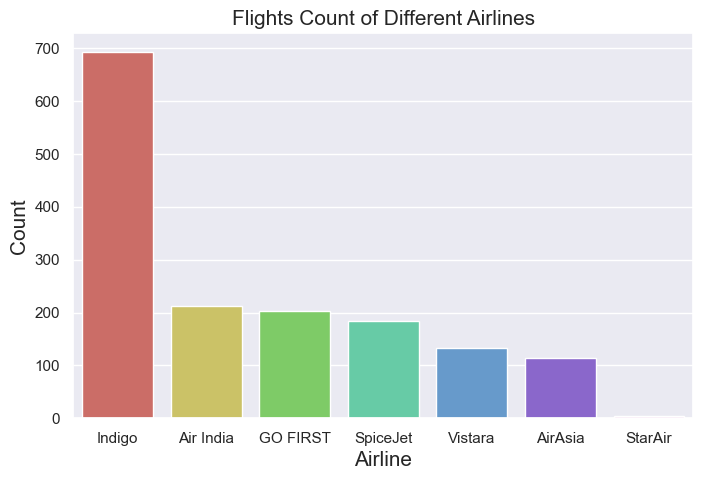

In [103]:
plt.figure(figsize=(8,5))
#This is the size of figure as width and height
order = df1['airline'].value_counts().index
#Order based on the counts of each unique value in the 'airline' column
sns.countplot(df1['airline'],order=order, palette='hls')
#hue, lightness, saturation
plt.title('Flights Count of Different Airlines',fontsize=15)
plt.xlabel('Airline',fontsize=15)
plt.ylabel('Count',fontsize=15)
plt.show()

In [104]:
df2=flight_data.groupby(['flight','airline','ticket_type'],as_index=False).count()
df2['ticket_type'].value_counts()

economy     1540
business     295
Name: ticket_type, dtype: int64

Most of the Airlines has Economic Class as common

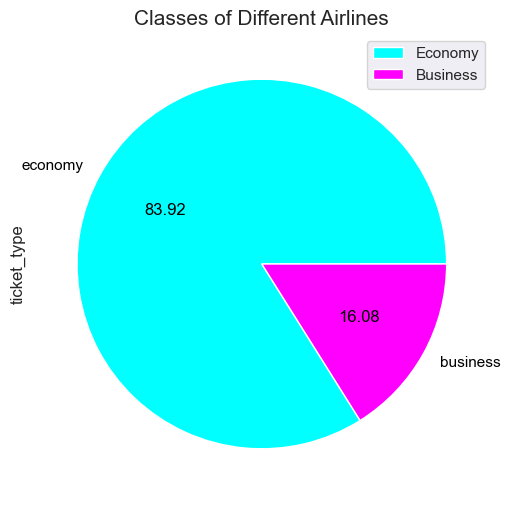

In [105]:
plt.figure(figsize=(8,6))
df2['ticket_type'].value_counts().plot(kind='pie',textprops={'color':'black'},autopct='%.2f',cmap='cool')
#Pie chart with text inside it in black font with 2 decimal places after '.' and colormap as cool color
plt.title('Classes of Different Airlines',fontsize=15)
plt.legend(['Economy','Business'])
plt.show()

Does price vary with Airlines?

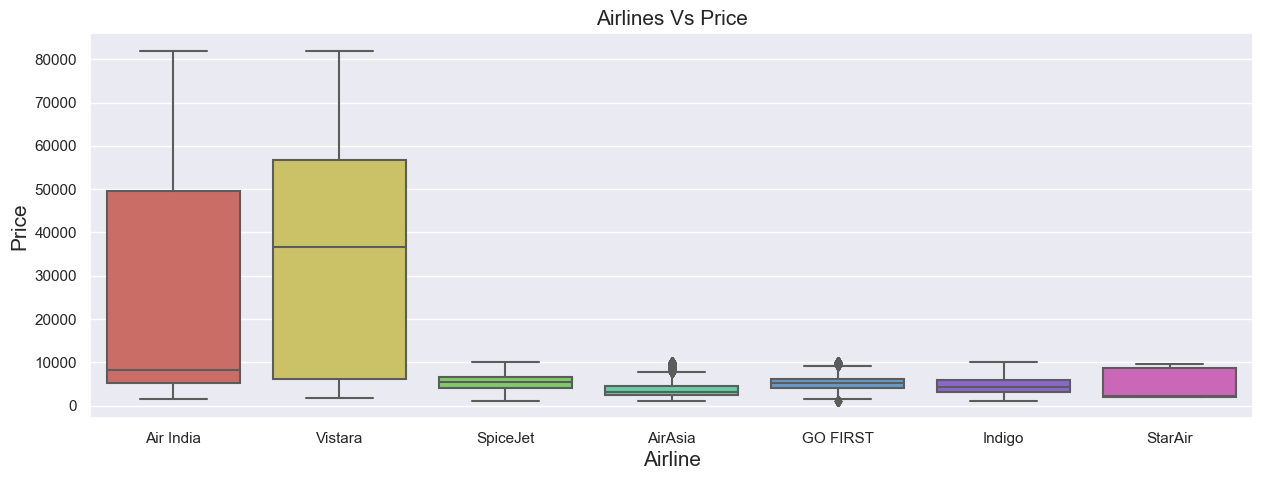

In [106]:
plt.figure(figsize=(15,5))
sns.boxplot(x=flight_data['airline'],y=flight_data['price'],palette='hls')
plt.title('Airlines Vs Price',fontsize=15)
plt.xlabel('Airline',fontsize=15)
plt.ylabel('Price',fontsize=15)
plt.show()

As we can see Vistara has Maximum Price range

Vistara and Air_India Airlines Have Maximum Price when compared to Others

SpiceJet , AirAsia , GO_First and Indigo has some what equal prices

Class and Ticket price range

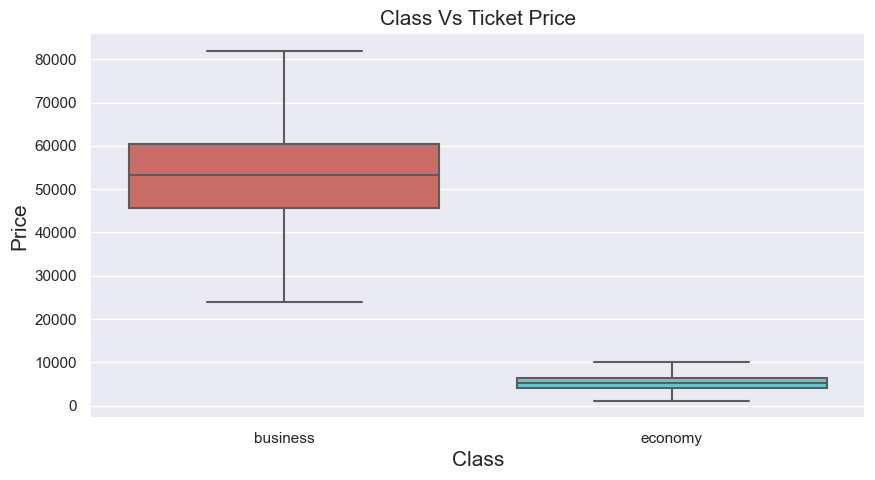

In [107]:
plt.figure(figsize=(10,5))
sns.boxplot(x='ticket_type',y='price',data=flight_data,palette='hls')
plt.title('Class Vs Ticket Price',fontsize=15)
plt.xlabel('Class',fontsize=15)
plt.ylabel('Price',fontsize=15)
plt.show()

How Does the Ticket Price vary with the number of stops of a Flight?

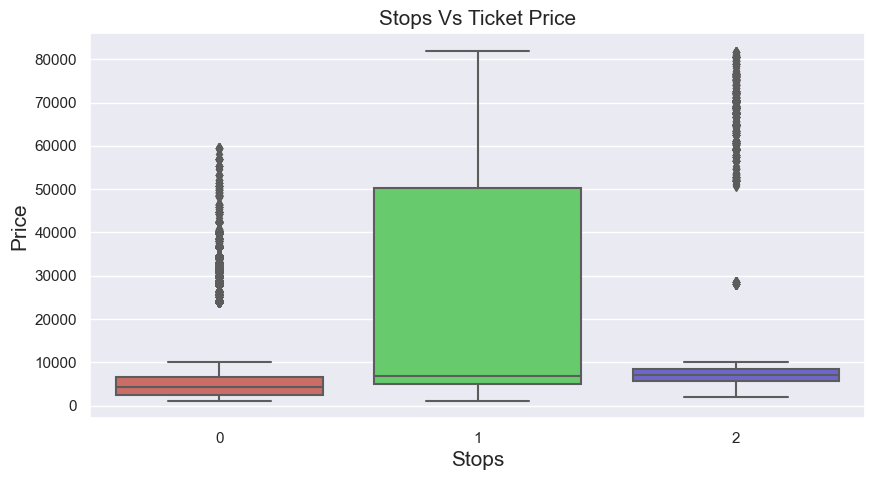

In [108]:
plt.figure(figsize=(10,5))
sns.boxplot(x='stop',y='price',data=flight_data,palette='hls')
plt.title('Stops Vs Ticket Price',fontsize=15)
plt.xlabel('Stops',fontsize=15)
plt.ylabel('Price',fontsize=15)
plt.show()

Flights having one stop has maximum ticket price

How the Ticket Price change based on the Departure Time and Arrival Time?

How the price changes with change in Source city and Destination city?


Text(0, 0.5, 'Price')

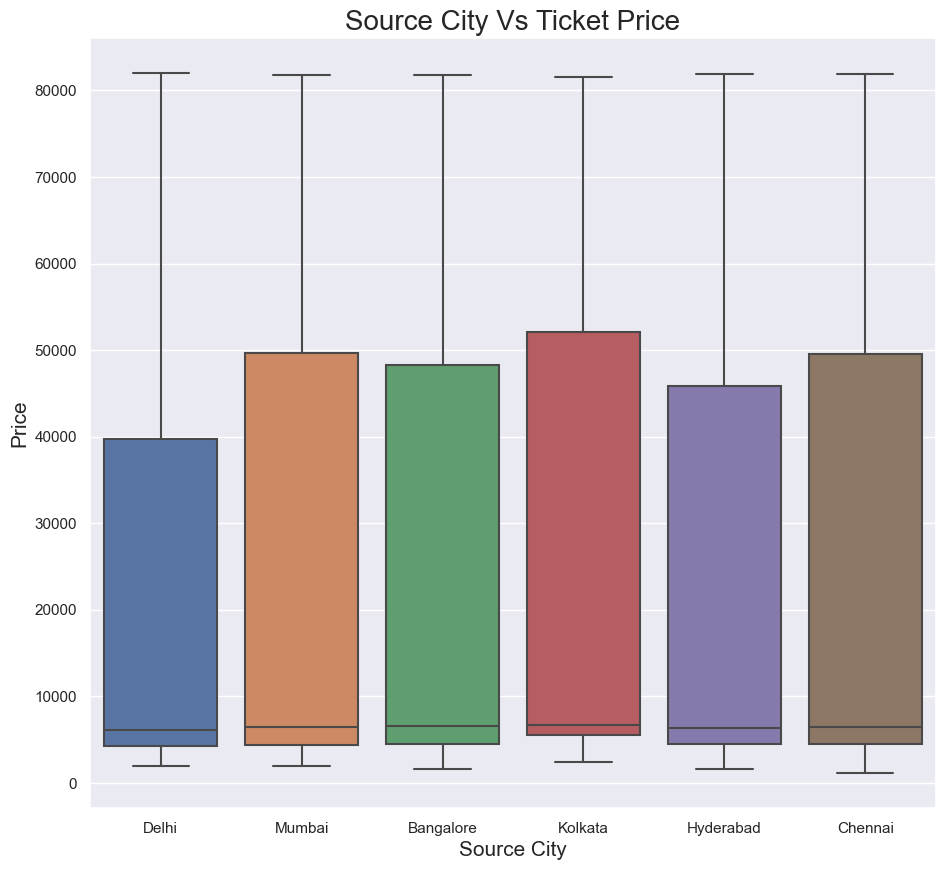

In [109]:
plt.figure(figsize=(24,10))
plt.subplot(1,2,1)
sns.boxplot(x='source',y='price',data=flight_data)
plt.title('Source City Vs Ticket Price',fontsize=20)
plt.xlabel('Source City',fontsize=15)
plt.ylabel('Price',fontsize=15)

Source City Vs Ticket Price

Ticket Price is More for the Flights whose Source City is Kolkata

Ticket Price is almost equal for flights Having Source Cities as Mumbai and Chennai , Hyderabad and Bangalore

Ticket Price is Low for the Flights Having Source City as Delhi

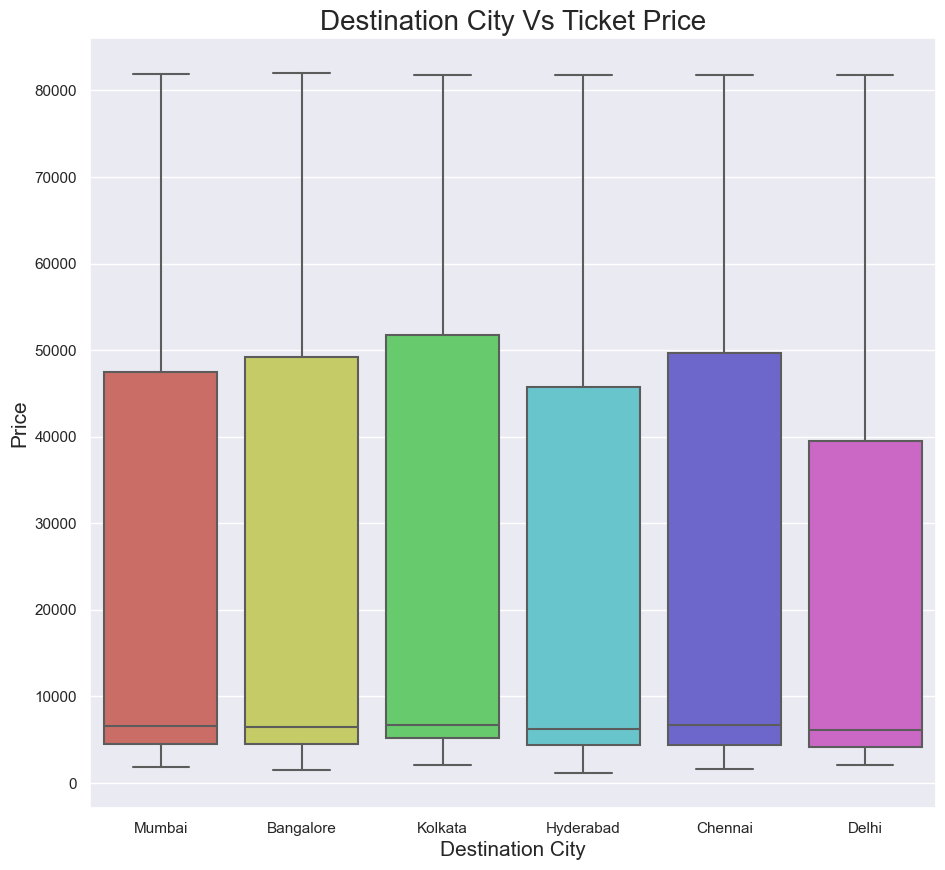

In [110]:
plt.figure(figsize=(24,10))
plt.subplot(1,2,2)
sns.boxplot(x='destination',y='price',data=flight_data,palette='hls')
plt.title('Destination City Vs Ticket Price',fontsize=20)
plt.xlabel('Destination City',fontsize=15)
plt.ylabel('Price',fontsize=15)
plt.show()

Destination City Vs Ticket Price

Ticket Price is More for the Flights whose Destination City is kolkata and Chennai

Ticket Price is almost equal for flights Having Destination Cities as Mumbai and Bangalore

Ticket Price is Low for the Flights Having Destination City as Delhi

How Price Varies with the Flight Duration Based on Class?

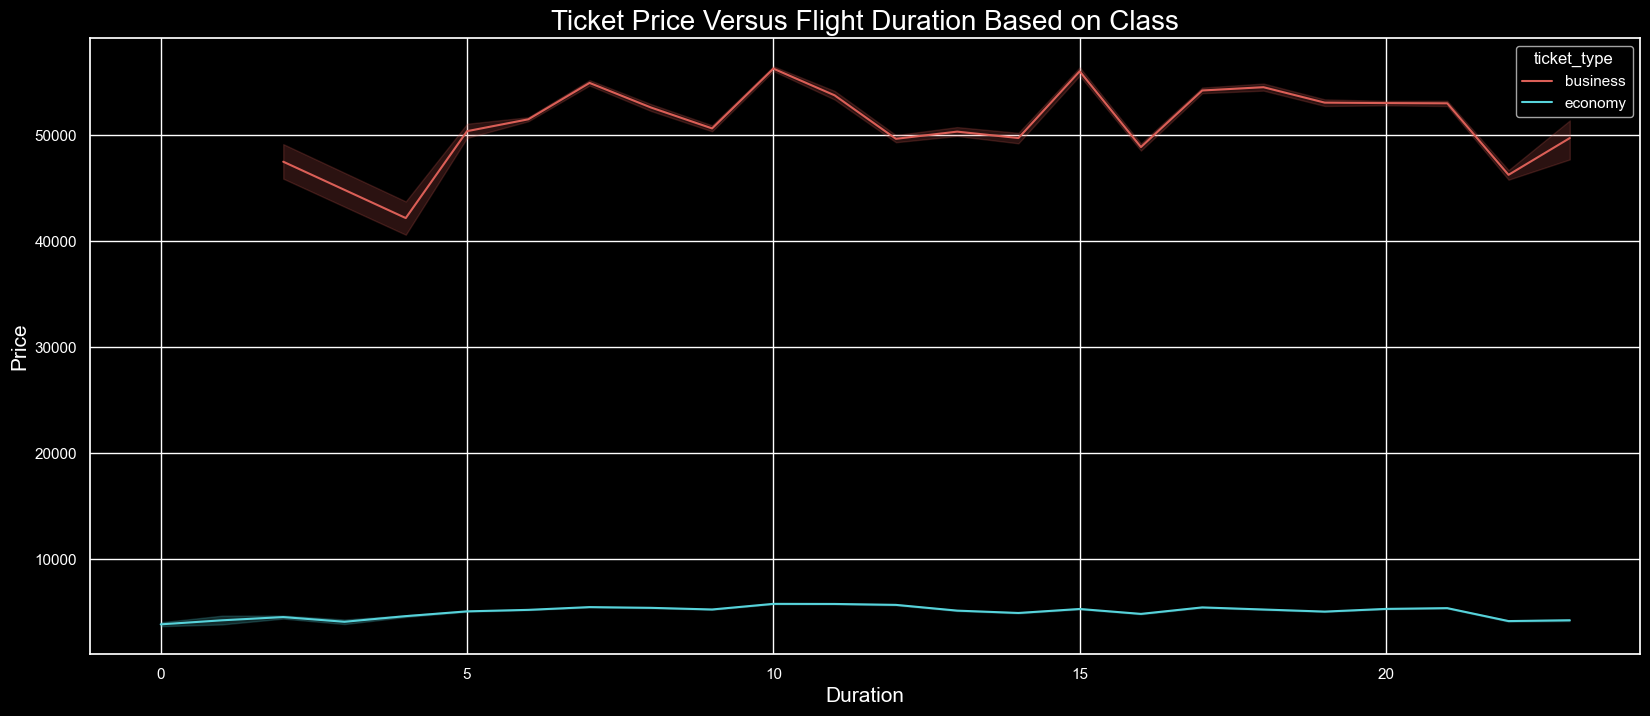

In [111]:
plt.style.use('dark_background')
plt.figure(figsize=(20,8))
sns.lineplot(data=flight_data,x='Dep_hour',y='price',hue='ticket_type',palette='hls')
plt.title('Ticket Price Versus Flight Duration Based on Class',fontsize=20)
plt.xlabel('Duration',fontsize=15)
plt.ylabel('Price',fontsize=15)
plt.show()

With increase in Duration, the Ticket Price is also Increases In both the Economy and Business classes

How does the price affected on the days left for Departure?

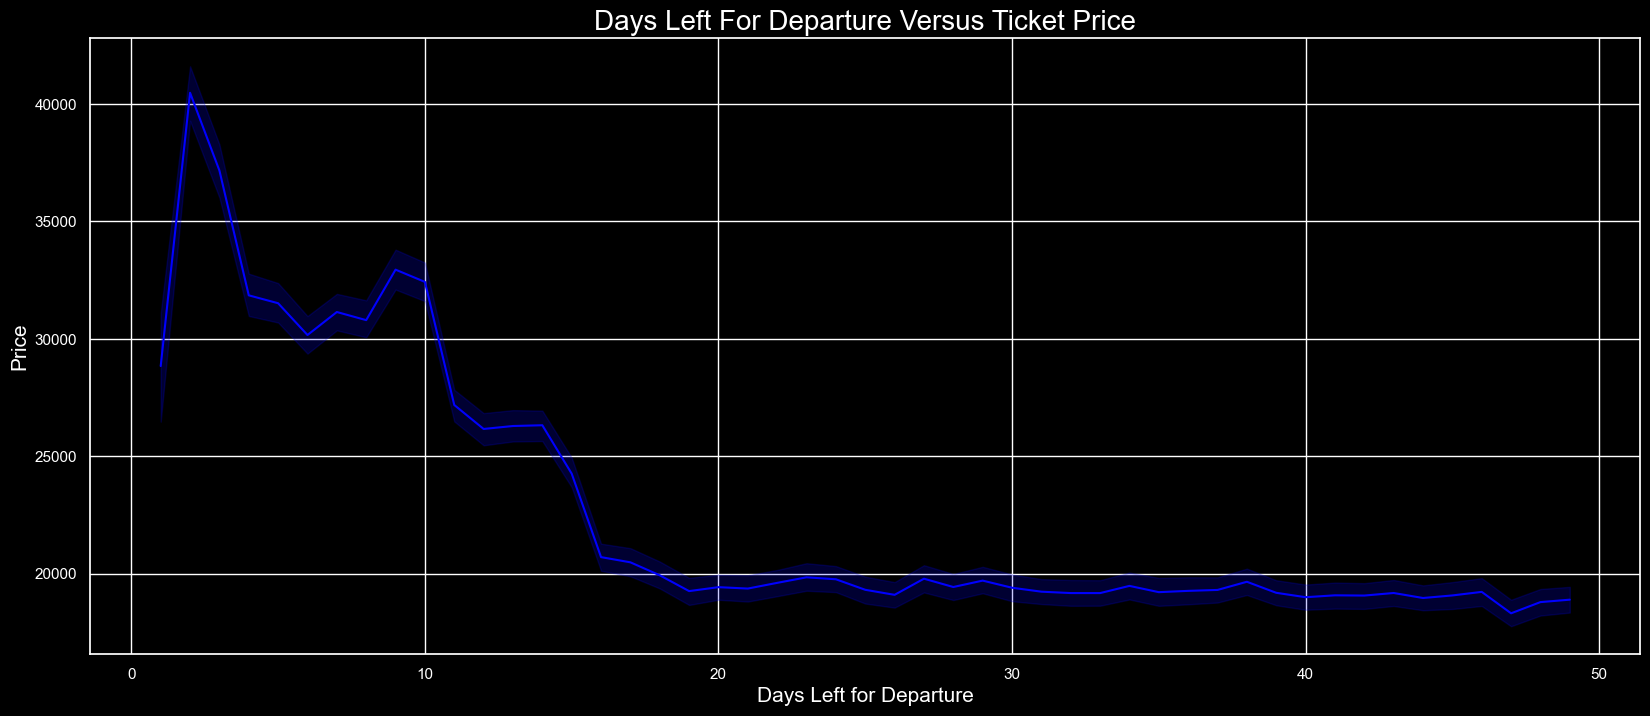

In [112]:
plt.figure(figsize=(20,8))
sns.lineplot(data=flight_data,x='days_left',y='price',color='blue')
plt.title('Days Left For Departure Versus Ticket Price',fontsize=20)
plt.xlabel('Days Left for Departure',fontsize=15)
plt.ylabel('Price',fontsize=15)
plt.show()

As we can see when compared to others when there are two days remaining for departure then the Ticket Price is very High for all airlines

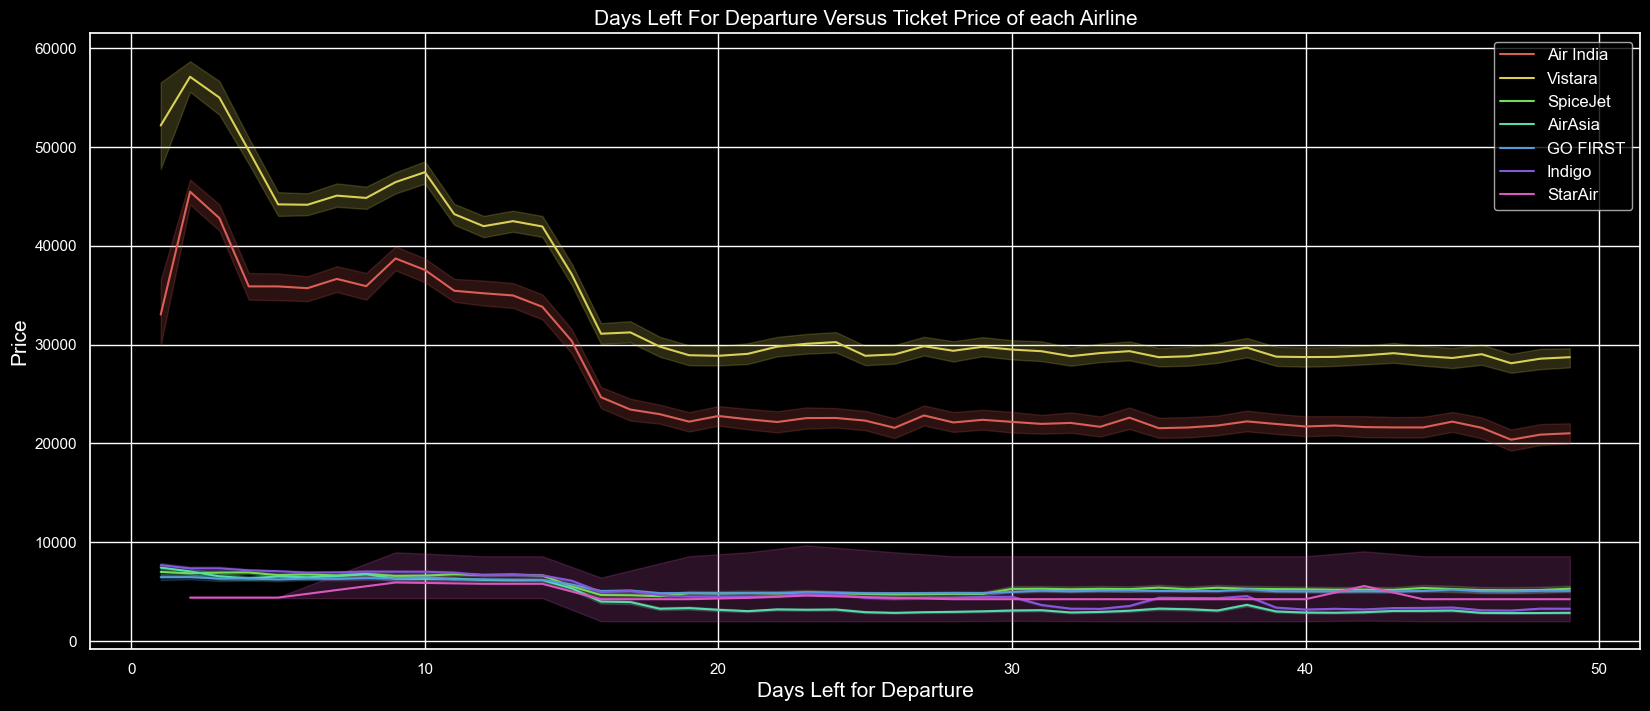

In [113]:
plt.figure(figsize=(20,8))
sns.lineplot(data=flight_data,x='days_left',y='price',color='blue',hue='airline',palette='hls')
plt.title('Days Left For Departure Versus Ticket Price of each Airline',fontsize=15)
plt.legend(fontsize=12)
plt.xlabel('Days Left for Departure',fontsize=15)
plt.ylabel('Price',fontsize=15)
plt.show()

Total number of Flights from one city to another

In [114]:
flight_data.groupby(['flight','source','destination','airline','ticket_type'],as_index=False).count().groupby(['source','destination'],as_index=False)['flight'].count().head(10)

,source,destination,flight
0,Bangalore,Chennai,103
1,Bangalore,Delhi,221
2,Bangalore,Hyderabad,131
3,Bangalore,Kolkata,166
4,Bangalore,Mumbai,170
5,Chennai,Bangalore,68
6,Chennai,Delhi,103
7,Chennai,Hyderabad,81
8,Chennai,Kolkata,110
9,Chennai,Mumbai,93


Total number of Flights from one city to another

# Making the training and testing dataset

In [115]:
# Creating a Back up File
flight_data_bk=flight_data.copy()

In [116]:
flight_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264268 entries, 0 to 264267
Data columns (total 16 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   airline         264268 non-null  object
 1   source          264268 non-null  object
 2   stop            264268 non-null  int64 
 3   destination     264268 non-null  object
 4   price           264268 non-null  int64 
 5   days_left       264268 non-null  int64 
 6   Journey_month   264268 non-null  int64 
 7   Journey_day     264268 non-null  int64 
 8   Dep_hour        264268 non-null  int64 
 9   Dep_min         264268 non-null  int64 
 10  Arrival_hour    264268 non-null  int64 
 11  Arrival_min     264268 non-null  int64 
 12  flight          264268 non-null  object
 13  Duration_hours  264268 non-null  int64 
 14  Duration_mins   264268 non-null  int64 
 15  ticket_type     264268 non-null  object
dtypes: int64(11), object(5)
memory usage: 32.3+ MB


In [117]:
flight_data.head()

,airline,source,stop,destination,price,days_left,Journey_month,Journey_day,Dep_hour,Dep_min,Arrival_hour,Arrival_min,flight,Duration_hours,Duration_mins,ticket_type
0,Air India,Delhi,0,Mumbai,25612,1,2,11,18,0,20,0,AI-868,2,0,business
1,Air India,Delhi,0,Mumbai,25612,1,2,11,19,0,21,15,AI-624,2,15,business
2,Air India,Delhi,1,Mumbai,42220,1,2,11,20,0,20,45,AI-531,24,45,business
3,Air India,Delhi,1,Mumbai,44450,1,2,11,21,25,23,55,AI-839,26,30,business
4,Air India,Delhi,1,Mumbai,46690,1,2,11,17,15,23,55,AI-544,6,40,business


In [118]:
# As Airline is Nominal Categorical data we will perform OneHotEncoding

airline = flight_data[["airline"]]
airline = pd.get_dummies(airline, drop_first= True)
airline.head()

,airline_AirAsia,airline_GO FIRST,airline_Indigo,airline_SpiceJet,airline_StarAir,airline_Vistara
0,0,0,0,0,0,0
1,0,0,0,0,0,0
2,0,0,0,0,0,0
3,0,0,0,0,0,0
4,0,0,0,0,0,0


In [119]:
# As Source is Nominal Categorical data we will perform OneHotEncoding
source = flight_data[["source"]]
source = pd.get_dummies(source, drop_first= True)
source.head()

,source_Chennai,source_Delhi,source_Hyderabad,source_Kolkata,source_Mumbai
0,0,1,0,0,0
1,0,1,0,0,0
2,0,1,0,0,0
3,0,1,0,0,0
4,0,1,0,0,0


In [120]:
# As Destination is Nominal Categorical data we will perform OneHotEncoding
destination = flight_data[["destination"]]
destination = pd.get_dummies(destination, drop_first = True)
destination.head()

,destination_Chennai,destination_Delhi,destination_Hyderabad,destination_Kolkata,destination_Mumbai
0,0,0,0,0,1
1,0,0,0,0,1
2,0,0,0,0,1
3,0,0,0,0,1
4,0,0,0,0,1


In [121]:
# As ticket_type is Nominal Categorical data we will perform OneHotEncoding

ticket_type = flight_data[["ticket_type"]]
ticket_type = pd.get_dummies(ticket_type, drop_first = True)
ticket_type

,ticket_type_economy
0,0
1,0
2,0
3,0
4,0
...,...
264263,1
264264,1
264265,1
264266,1


In [122]:
flight_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264268 entries, 0 to 264267
Data columns (total 16 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   airline         264268 non-null  object
 1   source          264268 non-null  object
 2   stop            264268 non-null  int64 
 3   destination     264268 non-null  object
 4   price           264268 non-null  int64 
 5   days_left       264268 non-null  int64 
 6   Journey_month   264268 non-null  int64 
 7   Journey_day     264268 non-null  int64 
 8   Dep_hour        264268 non-null  int64 
 9   Dep_min         264268 non-null  int64 
 10  Arrival_hour    264268 non-null  int64 
 11  Arrival_min     264268 non-null  int64 
 12  flight          264268 non-null  object
 13  Duration_hours  264268 non-null  int64 
 14  Duration_mins   264268 non-null  int64 
 15  ticket_type     264268 non-null  object
dtypes: int64(11), object(5)
memory usage: 32.3+ MB


In [123]:
# Concatenate dataframe --> flight_data + airline + ticket_type + flight +source +destination

flight_train = pd.concat([flight_data, airline, ticket_type,source,destination], axis = 1)

In [124]:
flight_train.head()

,airline,source,stop,destination,price,days_left,Journey_month,Journey_day,Dep_hour,Dep_min,Arrival_hour,Arrival_min,flight,Duration_hours,Duration_mins,ticket_type,airline_AirAsia,airline_GO FIRST,airline_Indigo,airline_SpiceJet,airline_StarAir,airline_Vistara,ticket_type_economy,source_Chennai,source_Delhi,source_Hyderabad,source_Kolkata,source_Mumbai,destination_Chennai,destination_Delhi,destination_Hyderabad,destination_Kolkata,destination_Mumbai
0,Air India,Delhi,0,Mumbai,25612,1,2,11,18,0,20,0,AI-868,2,0,business,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
1,Air India,Delhi,0,Mumbai,25612,1,2,11,19,0,21,15,AI-624,2,15,business,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
2,Air India,Delhi,1,Mumbai,42220,1,2,11,20,0,20,45,AI-531,24,45,business,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
3,Air India,Delhi,1,Mumbai,44450,1,2,11,21,25,23,55,AI-839,26,30,business,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
4,Air India,Delhi,1,Mumbai,46690,1,2,11,17,15,23,55,AI-544,6,40,business,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1


In [125]:
flight_train.drop(["airline", "ticket_type","flight", "source","destination","Arrival_hour","Arrival_min","Duration_hours","Duration_mins"], axis = 1, inplace = True)


In [126]:
flight_train

,stop,price,days_left,Journey_month,Journey_day,Dep_hour,Dep_min,airline_AirAsia,airline_GO FIRST,airline_Indigo,airline_SpiceJet,airline_StarAir,airline_Vistara,ticket_type_economy,source_Chennai,source_Delhi,source_Hyderabad,source_Kolkata,source_Mumbai,destination_Chennai,destination_Delhi,destination_Hyderabad,destination_Kolkata,destination_Mumbai
0,0,25612,1,2,11,18,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
1,0,25612,1,2,11,19,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
2,1,42220,1,2,11,20,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
3,1,44450,1,2,11,21,25,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
4,1,46690,1,2,11,17,15,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
264263,1,7697,49,3,31,7,5,0,0,0,0,0,1,1,1,0,0,0,0,0,0,1,0,0
264264,1,7709,49,3,31,7,5,0,0,0,0,0,1,1,1,0,0,0,0,0,0,1,0,0
264265,1,8640,49,3,31,12,30,0,0,0,0,0,1,1,1,0,0,0,0,0,0,1,0,0
264266,1,8640,49,3,31,9,45,0,0,0,0,0,1,1,1,0,0,0,0,0,0,1,0,0


In [127]:
flight_train.to_csv('flight_train.csv', index=False)


In [128]:
flight_train.shape

(264268, 24)

In [129]:
flight_train.columns


Index(['stop', 'price', 'days_left', 'Journey_month', 'Journey_day',
       'Dep_hour', 'Dep_min', 'airline_AirAsia', 'airline_GO FIRST',
       'airline_Indigo', 'airline_SpiceJet', 'airline_StarAir',
       'airline_Vistara', 'ticket_type_economy', 'source_Chennai',
       'source_Delhi', 'source_Hyderabad', 'source_Kolkata', 'source_Mumbai',
       'destination_Chennai', 'destination_Delhi', 'destination_Hyderabad',
       'destination_Kolkata', 'destination_Mumbai'],
      dtype='object')

Now our dataset is ready to split into training and testing set and for ML model

In [130]:
# storing the Dependent Variables in X and Independent Variable in Y
x=flight_train.drop(['price'],axis=1)
y=flight_train['price']

In [131]:
x.columns

Index(['stop', 'days_left', 'Journey_month', 'Journey_day', 'Dep_hour',
       'Dep_min', 'airline_AirAsia', 'airline_GO FIRST', 'airline_Indigo',
       'airline_SpiceJet', 'airline_StarAir', 'airline_Vistara',
       'ticket_type_economy', 'source_Chennai', 'source_Delhi',
       'source_Hyderabad', 'source_Kolkata', 'source_Mumbai',
       'destination_Chennai', 'destination_Delhi', 'destination_Hyderabad',
       'destination_Kolkata', 'destination_Mumbai'],
      dtype='object')

In [132]:
# Splitting the Data into Training set and Testing Set
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=42)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((184987, 23), (79281, 23), (184987,), (79281,))

In [133]:
# Scaling the values to convert the int values to Machine Languages
from sklearn.preprocessing import MinMaxScaler
mmscaler=MinMaxScaler(feature_range=(0,1))
x_train=mmscaler.fit_transform(x_train)
x_test=mmscaler.fit_transform(x_test)
x_train=pd.DataFrame(x_train)
x_test=pd.DataFrame(x_test) 

In [134]:
a={'Model Name':[], 'Mean_Absolute_Error_MAE':[] ,'Adj_R_Square':[] ,'Root_Mean_Squared_Error_RMSE':[] ,'Mean_Absolute_Percentage_Error_MAPE':[] ,'Mean_Squared_Error_MSE':[] ,'Root_Mean_Squared_Log_Error_RMSLE':[] ,'R2_score':[]}
Results=pd.DataFrame(a)
Results.head()

,Model Name,Mean_Absolute_Error_MAE,Adj_R_Square,Root_Mean_Squared_Error_RMSE,Mean_Absolute_Percentage_Error_MAPE,Mean_Squared_Error_MSE,Root_Mean_Squared_Log_Error_RMSLE,R2_score


In [135]:
# Build the Regression / Regressor models

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn import linear_model
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
import xgboost as xgb
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import GradientBoostingRegressor

# Create objects of Regression / Regressor models with default hyper-parameters
modelmlg = LinearRegression()
modeldcr = DecisionTreeRegressor()
modelbag = BaggingRegressor()
modelrfr = RandomForestRegressor()
modelSVR = SVR()
modelXGR = xgb.XGBRegressor()
modelKNN = KNeighborsRegressor(n_neighbors=5)
modelETR = ExtraTreesRegressor()
modelRE=Ridge()
modelLO=linear_model.Lasso(alpha=0.1)


from sklearn.ensemble import GradientBoostingRegressor

modelGBR = GradientBoostingRegressor(loss='squared_error', learning_rate=0.1, n_estimators=100, subsample=1.0,
                                     criterion='friedman_mse', min_samples_split=2, min_samples_leaf=1,
                                     min_weight_fraction_leaf=0.0, max_depth=3, min_impurity_decrease=0.0,
                                     init=None, random_state=None, max_features=None,
                                     alpha=0.9, verbose=0, max_leaf_nodes=None, warm_start=False,
                                     validation_fraction=0.1, n_iter_no_change=None, tol=0.0001, ccp_alpha=0.0)

# Evalution matrix for all the algorithms

MM = [modelmlg, modeldcr, modelrfr, modelKNN, modelETR, modelGBR, modelXGR, modelbag,modelRE,modelLO]

for models in MM:
    
    # Fit the model with train data
    
    models.fit(x_train, y_train)
    
    # Predict the model with test data

    y_pred = models.predict(x_test)
    
    # Print the model name
    
    print('Model Name: ', models)
    
    # Evaluation metrics for Regression analysis

    from sklearn import metrics
    print('Mean Absolute Error (MAE):', round(metrics.mean_absolute_error(y_test, y_pred),3))  
    print('Mean Squared Error (MSE):', round(metrics.mean_squared_error(y_test, y_pred),3))  
    print('Root Mean Squared Error (RMSE):', round(np.sqrt(metrics.mean_squared_error(y_test, y_pred)),3))
    print('R2_score:', round(metrics.r2_score(y_test, y_pred),6))
    print('Root Mean Squared Log Error (RMSLE):', round(np.log(np.sqrt(metrics.mean_squared_error(y_test, y_pred))),3))
    
    # Define the function to calculate the MAPE - Mean Absolute Percentage Error

    def MAPE (y_test, y_pred):
        y_test, y_pred = np.array(y_test), np.array(y_pred)
        return np.mean(np.abs((y_test - y_pred) / y_test)) * 100
    
    # Evaluation of MAPE 

    result = MAPE(y_test, y_pred)
    print('Mean Absolute Percentage Error (MAPE):', round(result, 2), '%')
    
    # Calculate Adjusted R squared values 

    r_squared = round(metrics.r2_score(y_test, y_pred),6)
    adjusted_r_squared = round(1 - (1-r_squared)*(len(y)-1)/(len(y)-x.shape[1]-1),6)
    print('Adj R Square: ', adjusted_r_squared)
    print('------------------------------------------------------------------------------------------------------------')
    #-------------------------------------------------------------------------------------------
    new_row = {'Model Name' : models,
               'Mean_Absolute_Error_MAE' : metrics.mean_absolute_error(y_test, y_pred),
               'Adj_R_Square' : adjusted_r_squared,
               'Root_Mean_Squared_Error_RMSE' : np.sqrt(metrics.mean_squared_error(y_test, y_pred)),
               'Mean_Absolute_Percentage_Error_MAPE' : result,
               'Mean_Squared_Error_MSE' : metrics.mean_squared_error(y_test, y_pred),
               'Root_Mean_Squared_Log_Error_RMSLE': np.log(np.sqrt(metrics.mean_squared_error(y_test, y_pred))),
               'R2_score' : metrics.r2_score(y_test, y_pred)}
    Results = Results.append(new_row, ignore_index=True)
    #------------------------------------------------------------


Model Name:  LinearRegression()
Mean Absolute Error (MAE): 3923.721
Mean Squared Error (MSE): 36135720.932
Root Mean Squared Error (RMSE): 6011.299
R2_score: 0.93428
Root Mean Squared Log Error (RMSLE): 8.701
Mean Absolute Percentage Error (MAPE): 35.63 %
Adj R Square:  0.934274
------------------------------------------------------------------------------------------------------------
Model Name:  DecisionTreeRegressor()
Mean Absolute Error (MAE): 1018.127
Mean Squared Error (MSE): 9480481.206
Root Mean Squared Error (RMSE): 3079.039
R2_score: 0.982758
Root Mean Squared Log Error (RMSLE): 8.032
Mean Absolute Percentage Error (MAPE): 6.35 %
Adj R Square:  0.982756
------------------------------------------------------------------------------------------------------------
Model Name:  RandomForestRegressor()
Mean Absolute Error (MAE): 1029.599
Mean Squared Error (MSE): 8316718.73
Root Mean Squared Error (RMSE): 2883.872
R2_score: 0.984874
Root Mean Squared Log Error (RMSLE): 7.967
Mean 

In [136]:
Results

,Model Name,Mean_Absolute_Error_MAE,Adj_R_Square,Root_Mean_Squared_Error_RMSE,Mean_Absolute_Percentage_Error_MAPE,Mean_Squared_Error_MSE,Root_Mean_Squared_Log_Error_RMSLE,R2_score
0,LinearRegression(),3923.720627,0.934274,6011.299438,35.630066,3.613572e+07,8.701396,0.934280
1,DecisionTreeRegressor(),1018.127400,0.982756,3079.039007,6.353211,9.480481e+06,8.032373,0.982758
2,"(DecisionTreeRegressor(max_features=1.0, rando...",1029.598879,0.984873,2883.872176,6.273533,8.316719e+06,7.966889,0.984874
3,KNeighborsRegressor(),1285.679709,0.982223,3126.298595,8.349309,9.773743e+06,8.047605,0.982225
4,"(ExtraTreeRegressor(random_state=490686798), E...",1012.689774,0.983648,2998.371356,6.351179,8.990231e+06,8.005825,0.983649
5,([DecisionTreeRegressor(criterion='friedman_ms...,2723.688021,0.960766,4644.423881,19.010378,2.157067e+07,8.443423,0.960769
6,"XGBRegressor(base_score=None, booster=None, ca...",1628.257931,0.982501,3101.707885,12.112812,9.620592e+06,8.039708,0.982503
7,(DecisionTreeRegressor(random_state=842379258)...,1041.696346,0.984495,2919.678106,6.414614,8.524520e+06,7.979229,0.984496
8,Ridge(),3924.212827,0.934274,6011.318184,35.647112,3.613595e+07,8.701399,0.934280
9,Lasso(alpha=0.1),3923.857021,0.934273,6011.337926,35.636014,3.613618e+07,8.701403,0.934279


In [137]:
models=['LinearRegression','DecisionTreeRegressor','RandomForestRegressor','KNeighborsRegressor','ExtraTreesRegressor','GradientBoostingRegressor','XGBRegressor','BaggingRegressor','Ridge Regression','Lasso Regression']
result=pd.DataFrame({'Model_Name':models})
result['Adj_R_Square']=Results['Adj_R_Square']
result['Mean_Absolute_Error_MAE']=Results['Mean_Absolute_Error_MAE']
result['Root_Mean_Squared_Error_RMSE']=Results['Root_Mean_Squared_Error_RMSE']
result['Mean_Absolute_Percentage_Error_MAPE']=Results['Mean_Absolute_Percentage_Error_MAPE']
result['Mean_Squared_Error_MSE']=Results['Mean_Squared_Error_MSE']
result['Root_Mean_Squared_Log_Error_RMSLE']=Results['Root_Mean_Squared_Log_Error_RMSLE']
result['R2_score']=Results['R2_score']
result=result.sort_values(by='Adj_R_Square',ascending=False).reset_index(drop=True)
result

,Model_Name,Adj_R_Square,Mean_Absolute_Error_MAE,Root_Mean_Squared_Error_RMSE,Mean_Absolute_Percentage_Error_MAPE,Mean_Squared_Error_MSE,Root_Mean_Squared_Log_Error_RMSLE,R2_score
0,RandomForestRegressor,0.984873,1029.598879,2883.872176,6.273533,8.316719e+06,7.966889,0.984874
1,BaggingRegressor,0.984495,1041.696346,2919.678106,6.414614,8.524520e+06,7.979229,0.984496
2,ExtraTreesRegressor,0.983648,1012.689774,2998.371356,6.351179,8.990231e+06,8.005825,0.983649
3,DecisionTreeRegressor,0.982756,1018.127400,3079.039007,6.353211,9.480481e+06,8.032373,0.982758
4,XGBRegressor,0.982501,1628.257931,3101.707885,12.112812,9.620592e+06,8.039708,0.982503
5,KNeighborsRegressor,0.982223,1285.679709,3126.298595,8.349309,9.773743e+06,8.047605,0.982225
6,GradientBoostingRegressor,0.960766,2723.688021,4644.423881,19.010378,2.157067e+07,8.443423,0.960769
7,LinearRegression,0.934274,3923.720627,6011.299438,35.630066,3.613572e+07,8.701396,0.934280
8,Ridge Regression,0.934274,3924.212827,6011.318184,35.647112,3.613595e+07,8.701399,0.934280
9,Lasso Regression,0.934273,3923.857021,6011.337926,35.636014,3.613618e+07,8.701403,0.934279


From the Above Results, The Top 3 Models by comparing Errors , Adj_R_Square and R2_Score values are

 1. RandomForestRegressor 2. Bagging Regressor 3. ExtraTreesRegressor

In [138]:
#Trainig the model with
modelrfr.fit(x_train, y_train)
    
# Predict the model with test data

y_pred = modelrfr.predict(x_test)

In [139]:
out=pd.DataFrame({'Price_actual':y_test,'Price_pred':y_pred})
result=flight_data_bk.merge(out,left_index=True,right_index=True)

In [150]:
result.sample(10)

,airline,source,stop,destination,price,days_left,Journey_month,Journey_day,Dep_hour,Dep_min,Arrival_hour,Arrival_min,flight,Duration_hours,Duration_mins,ticket_type,Price_actual,Price_pred
129489,Vistara,Mumbai,0,Delhi,2339,23,3,5,11,55,14,5,UK-960,2,10,economy,2339,2339.000000
246472,Indigo,Chennai,1,Delhi,4541,35,3,17,17,5,1,5,6E-562,8,0,economy,4541,4076.418000
140309,Vistara,Mumbai,0,Bangalore,2074,37,3,19,21,0,22,50,UK-857,1,50,economy,2074,2074.000000
10097,Vistara,Delhi,0,Kolkata,29656,24,3,6,17,30,19,35,UK-707,2,5,business,29656,31302.400000
114876,GO FIRST,Delhi,1,Hyderabad,5657,15,2,25,18,40,0,5,G8-119,5,25,economy,5657,5608.070000
45988,Air India,Bangalore,1,Kolkata,60508,40,3,22,17,20,19,10,AI-503,25,50,business,60508,60508.000000
223924,Air India,Hyderabad,1,Mumbai,7774,7,2,17,20,50,20,0,AI-840,23,10,economy,7774,7774.000000
77854,Vistara,Chennai,1,Delhi,57920,13,2,23,7,0,12,40,UK-828,5,40,business,57920,60666.049014
222531,Vistara,Hyderabad,1,Delhi,5823,41,3,23,18,30,23,45,UK-894,5,15,economy,5823,5823.000000
237216,SpiceJet,Hyderabad,1,Kolkata,8757,34,3,16,16,50,17,55,SG-3283,25,5,economy,8757,8757.000000


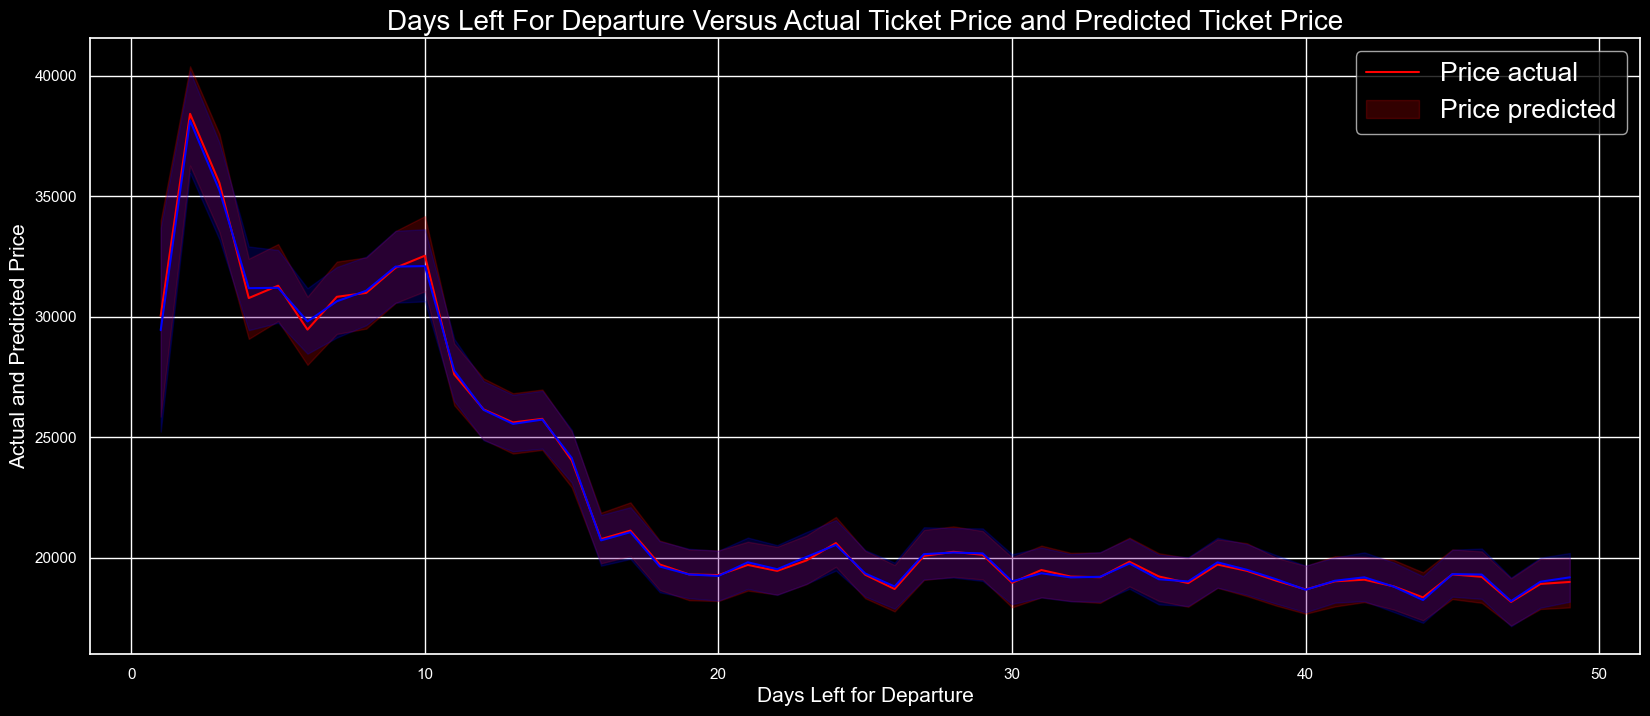

In [141]:
plt.figure(figsize=(20,8))
sns.lineplot(data=result,x='days_left',y='Price_actual',color='red')
sns.lineplot(data=result,x='days_left',y='Price_pred',color='blue')
plt.title('Days Left For Departure Versus Actual Ticket Price and Predicted Ticket Price',fontsize=20)
plt.legend(labels=['Price actual','Price predicted'],fontsize=19)
plt.xlabel('Days Left for Departure',fontsize=15)
plt.ylabel('Actual and Predicted Price',fontsize=15)
plt.show()

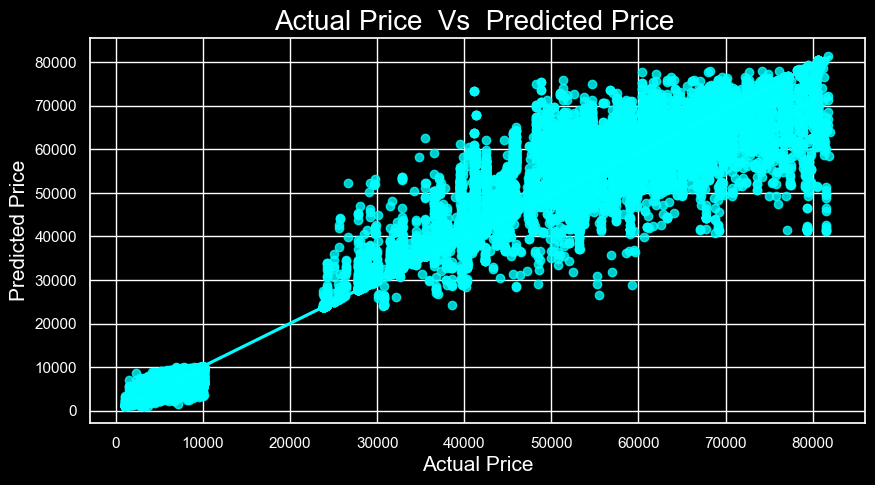

In [142]:
plt.figure(figsize=(10,5))
sns.regplot(x='Price_actual',y='Price_pred',data=result,color='cyan')
plt.title('Actual Price  Vs  Predicted Price ',fontsize=20)
plt.xlabel('Actual Price',fontsize=15)
plt.ylabel('Predicted Price',fontsize=15)
plt.show()

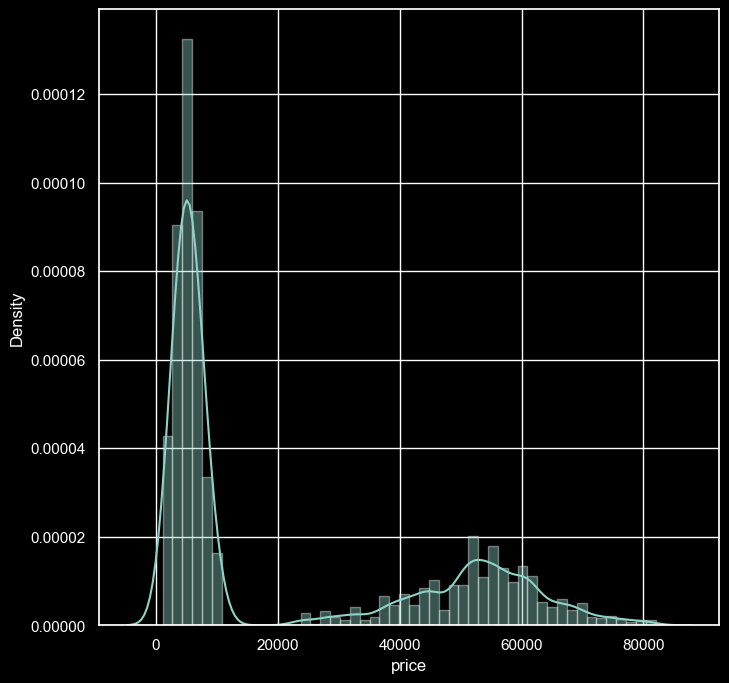

In [143]:
plt.figure(figsize = (8,8))
sns.distplot(y)
plt.show()

# Save the model to reuse it again


In [147]:
import pickle
# open a file, where you Want to store the data
file = open('flight_rf.pkl', 'wb')

# dump information to that file
pickle.dump(modelrfr, file)

In [148]:
model = open('flight_rf.pkl','rb')
forest = pickle.load(model)

In [149]:
metrics.r2_score(y_test, y_pred)

0.9848584139654616